# Import libraries

In [1]:
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

from IPython.display import display

import seaborn as sns

# Load dataset:

In [3]:
df = pd.read_csv("data/loan_data_2007_2014_v2.csv")
print(df.shape)

(466285, 206)


In [4]:
display(df.head(2))

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   
1    309xx         GA   1.00          0.0           Apr-99             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN            5000.0     NaN   
1          NaN          NaN         NaN       NaN            2500.0     NaN   

   total_cu_tl  inq_last_12m  emp_length_int  term_months  \
0          NaN           NaN            10.0           36   
1          NaN           NaN             0.0           60   

  earliest_cr_line_date  months_since_earliest_cr_line issue_d_dates  \
0            1985-01-01                          436.0    2011-12-01   
1            1999-04-01                          265.0    2011-12-01   

   months_since_issue_d  grade:A  grade:B  grade:C  grade:D  grade:E  grade

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Columns: 206 entries, id to initial_list_status:w
dtypes: float64(49), int64(133), object(24)
memory usage: 732.8+ MB


None

In [6]:
checknull = df.isnull().mean()
display(checknull[checknull>0])

emp_title                        0.059166
emp_length                       0.045054
desc                             0.729815
title                            0.000043
delinq_2yrs                      0.000062
earliest_cr_line                 0.000062
inq_last_6mths                   0.000062
mths_since_last_delinq           0.536906
mths_since_last_record           0.865666
open_acc                         0.000062
pub_rec                          0.000062
revol_util                       0.000729
total_acc                        0.000062
last_pymnt_d                     0.000806
next_pymnt_d                     0.487286
last_credit_pull_d               0.000090
collections_12_mths_ex_med       0.000311
mths_since_last_major_derog      0.787739
annual_inc_joint                 1.000000
dti_joint                        1.000000
verification_status_joint        1.000000
acc_now_delinq                   0.000062
tot_coll_amt                     0.150715
tot_cur_bal                      0

# Data Preparation for PD model

###### Weight of evidence
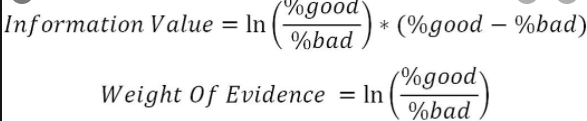
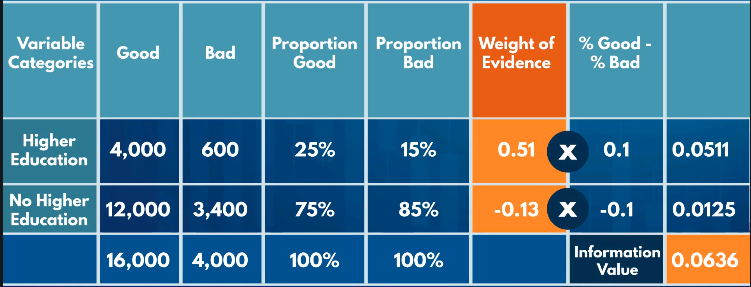
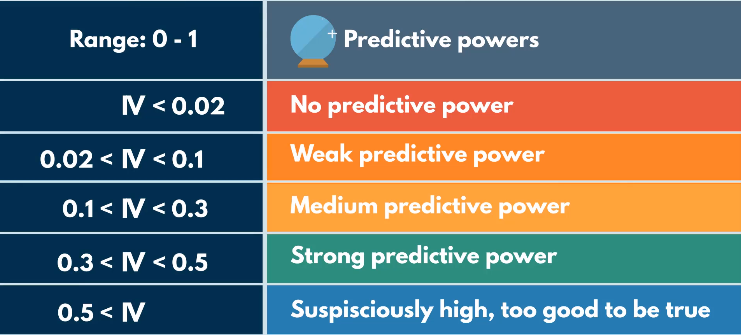

###### Fine Classing: Grouping continous features into classes
###### Coarse classing: Coarse classing is where a binning process is applied to the fine granular bins to merge those with similar risk and create fewer bins
###### Cardinality refers to the number of possible values that a feature can assume.

## 1) Preparing Dependent Variable
 Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [7]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [8]:
#####  A charge-off is a debt that a creditor has given up trying to collect on after the debtor

In [9]:
df['loan_status'].value_counts()/df['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [10]:
# o means bad/default and 1 means good/non-default
df['good_bad'] = np.where(
    df['loan_status'].isin(
        ['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),
        0,1)

In [11]:
df['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

## 2) Spliting Data

In [12]:
from sklearn.model_selection import train_test_split

In [283]:
X = df.drop('good_bad',axis=1)
y = df['good_bad']

# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [284]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(373028, 206) (93257, 206)
(373028,) (93257,)


In [552]:
df_inputs_prepr = X_test
df_targets_prepr = y_test

In [553]:
# data preparation for train data

## 3) Pre-processing Discrete Variables

### 3.1) Data Preparation Example (Taking grade feature only)

In [554]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [555]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)

In [556]:
display(df1.head(2))

grade  good_bad
362514     C         1
288564     E         1

In [557]:
df1.columns.values[0]

'grade'

In [558]:
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [559]:
#since 1 representing good , taking mean, we will get prop. of good
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.962338
1     B  0.923085
2     C  0.882905
3     D  0.844314
4     E  0.805178
5     F  0.775472
6     G  0.697605

In [560]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [561]:
display(df1.head())

grade  good_bad grade  good_bad
0     A     15108     A  0.962338
1     B     27199     B  0.923085
2     C     25048     C  0.882905
3     D     15390     D  0.844314
4     E      7145     E  0.805178

In [562]:
# Selects only columns with specific indexes.
df1 = df1.iloc[:,[0,1,3]]

In [563]:
# Changes the names of the columns of a dataframe.
df1.columns = [df1.columns.values[0],'n_obs','prop_good']
df1.head()

grade  n_obs  prop_good
0     A  15108   0.962338
1     B  27199   0.923085
2     C  25048   0.882905
3     D  15390   0.844314
4     E   7145   0.805178

In [564]:
# We divide the values of one column by the total sum to get the proportion of each category
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
display(df1)

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.962338    0.162004
1     B  27199   0.923085    0.291656
2     C  25048   0.882905    0.268591
3     D  15390   0.844314    0.165028
4     E   7145   0.805178    0.076616
5     F   2699   0.775472    0.028942
6     G    668   0.697605    0.007163

In [565]:
df1['n_good']= df1['prop_good'] * df1['n_obs']
df1['n_bad']= df1['n_obs']-df1['n_good'] #(1-df1['prop_good'])*df1['n_obs']
display(df1)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.962338    0.162004  14539.0   569.0
1     B  27199   0.923085    0.291656  25107.0  2092.0
2     C  25048   0.882905    0.268591  22115.0  2933.0
3     D  15390   0.844314    0.165028  12994.0  2396.0
4     E   7145   0.805178    0.076616   5753.0  1392.0
5     F   2699   0.775472    0.028942   2093.0   606.0
6     G    668   0.697605    0.007163    466.0   202.0

In [566]:
#propotion of good and bad of each category
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
display(df1)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   
1     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
2     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
5     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
6     G    668   0.697605    0.007163    466.0   202.0     0.005610   

   prop_n_bad  
0    0.055839  
1    0.205299  
2    0.287831  
3    0.235132  
4    0.136605  
5    0.059470  
6    0.019823

In [567]:
# We take the natural logarithm of a variable
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
display(df1)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   
1     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
2     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
5     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
6     G    668   0.697605    0.007163    466.0   202.0     0.005610   

   prop_n_bad       WoE  
0    0.055839  1.142469  
1    0.205299  0.386785  
2    0.287831 -0.078010  
3    0.235132 -0.407554  
4    0.136605 -0.679261  
5    0.059470 -0.858767  
6    0.019823 -1.262323

In [568]:
#sorting values by weight of evidence
df1 = df1.sort_values('WoE')
df1 = df1.reset_index(drop=True)

display(df1)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  
0    0.019823 -1.262323  
1    0.059470 -0.858767  
2    0.136605 -0.679261  
3    0.235132 -0.407554  
4    0.287831 -0.078010  
5    0.205299  0.386785  
6    0.055839  1.142469

In [569]:
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.

df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

display(df1)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.019823 -1.262323             NaN       NaN  
1    0.059470 -0.858767        0.077868  0.403556  
2    0.136605 -0.679261        0.029706  0.179506  
3    0.235132 -0.407554        0.039136  0.271707  
4    0.287831 -0.078010        0.038590  0.329543  
5    0.205299  0.386785        0.040181  0.464796  
6    0.055839  1.142469        0.039252  0.755683

In [570]:
df1['IV'] = ((df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE'])
display(df1)
df1['IV'] = df1['IV'].sum()
display(df1)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019823 -1.262323             NaN       NaN  0.017942  
1    0.059470 -0.858767        0.077868  0.403556  0.029433  
2    0.136605 -0.679261        0.029706  0.179506  0.045746  
3    0.235132 -0.407554        0.039136  0.271707  0.032076  
4    0.287831 -0.078010        0.038590  0.329543  0.001685  
5    0.205299  0.386785        0.040181  0.464796  0.037499  
6    0.055839  1.142469        0.039252  0.755683  0.136169

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019823 -1.262323             NaN       NaN  0.300551  
1    0.059470 -0.858767        0.077868  0.403556  0.300551  
2    0.136605 -0.679261        0.029706  0.179506  0.300551  
3    0.235132 -0.407554        0.039136  0.271707  0.300551  
4    0.287831 -0.078010        0.038590  0.329543  0.300551  
5    0.205299  0.386785        0.040181  0.464796  0.300551  
6    0.055839  1.142469        0.039252  0.755683  0.300551

### 3.2) Pre-processing discrete variables: Automating above example

In [571]:
def woe_discrete(df1,variable_name,df_target):
    df1 = pd.concat([df1[variable_name],df_target],axis=1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()
                     ,df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'n_obs','prop_good']
    
    df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    df1['n_good']= df1['prop_good'] * df1['n_obs']
    df1['n_bad']= df1['n_obs']-df1['n_good'] #(1-df1['prop_good'])*df1['n_obs']

    df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()

    df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

    df1 = df1.sort_values('WoE')
    df1 = df1.reset_index(drop=True)

    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_WoE'] = df1['WoE'].diff().abs()

    df1['IV'] = ((df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE'])    
    df1['IV'] = df1['IV'].sum()
    return df1

In [572]:
woe_grade = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
display(woe_grade)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019823 -1.262323             NaN       NaN  0.300551  
1    0.059470 -0.858767        0.077868  0.403556  0.300551  
2    0.136605 -0.679261        0.029706  0.179506  0.300551  
3    0.235132 -0.407554        0.039136  0.271707  0.300551  
4    0.287831 -0.078010        0.038590  0.329543  0.300551  
5    0.205299  0.386785        0.040181  0.464796  0.300551  
6    0.055839  1.142469        0.039252  0.755683  0.300551

### 3.3) Preprocessing discrete variables:  Visualization of result i.e WoE

In [573]:
import matplotlib.pyplot as plt
import seaborn as sns

In [574]:
def plot_woe(df,rotation_x_axis=0):
    x = np.array(df.iloc[:,0].apply(str))
    y = df['WoE']
    
    plt.figure(figsize=(18,6)) # Sets the graph size to width 18 x height 6.
    
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    plt.plot(x,y,marker='o',linestyle='--',color='g')
    plt.title("Weight of evidence by "+df.columns[0])
    plt.xlabel(df.columns[0]+" categories")  # Names the x-axis with the name of the column with index 0.
    plt.ylabel("WoE") # Names the y-axis 'Weight of Evidence'.
    
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.xticks(rotation = rotation_x_axis)    
    
    plt.show()

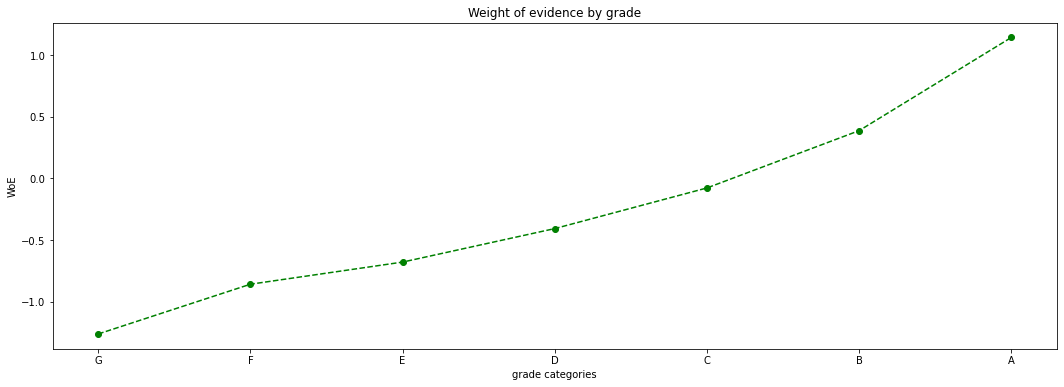

In [575]:
plot_woe(woe_grade)

In [576]:
dummy_variables     = []
reference_variables = []

### 3.4) Pre-processing discrete variables: Creating Dummy Variables of "home_ownership"

In [577]:
# 'home_ownership'

# We calculate weight of evidence.
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

display(df_temp)

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.777778    0.000483     35.0    10.0     0.000421   
1           NONE     10   0.800000    0.000107      8.0     2.0     0.000096   
2           RENT  37874   0.874003    0.406125  33102.0  4772.0     0.398498   
3            OWN   8409   0.888572    0.090170   7472.0   937.0     0.089951   
4       MORTGAGE  46919   0.904751    0.503115  42450.0  4469.0     0.511033   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000981 -0.845478             NaN       NaN  0.022938  
1    0.000196 -0.711946        0.022222  0.133531  0.022938  
2    0.468302 -0.161412        0.074003  0.550534  0.022938  
3    0.091953 -0.022006        0.014568  0.139406  0.022938  
4    0.438567  0.152922        0.016179  0.174928  0.022938

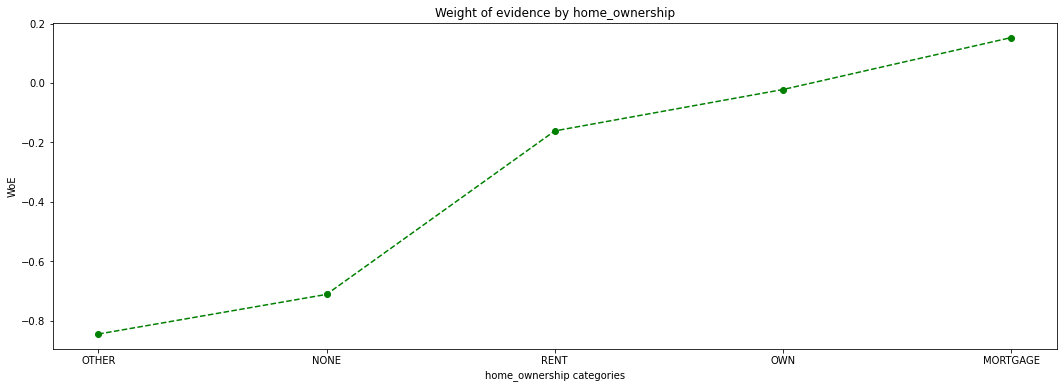

In [578]:
plot_woe(df_temp)

In [579]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### 3.5) Pre-processing discrete variables: Creating Dummy Variables of "addr_state"

In [580]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [581]:
# We calculate weight of evidence.
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
display(df_temp)

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000011      0.0     1.0     0.000000   
1          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
2          NV   1298   0.855932    0.013919   1111.0   187.0     0.013375   
3          HI    486   0.860082    0.005211    418.0    68.0     0.005032   
4          FL   6426   0.870059    0.068906   5591.0   835.0     0.067307   
5          AL   1182   0.873096    0.012675   1032.0   150.0     0.012424   
6          NJ   3676   0.875408    0.039418   3218.0   458.0     0.038740   
7          LA   1130   0.876106    0.012117    990.0   140.0     0.011918   
8          NY   8031   0.879965    0.086117   7067.0   964.0     0.085076   
9          RI    403   0.880893    0.004321    355.0    48.0     0.004274   
10         NC   2478   0.881759    0.026572   2185.0   293.0     0.026304   
11         MI   2358   0.882103    0.025285   2080.0   278.0     0.025040   
12         DE    208   0.884615    0.002230    184.0    24.0     0.002215   
13         MD   2203   0.884703    0.023623   1949.0   254.0     0.023463   
14         OK    833   0.885954    0.008932    738.0    95.0     0.008884   
15         MO   1491   0.885983    0.015988   1321.0   170.0     0.015903   
16         AR    728   0.887363    0.007806    646.0    82.0     0.007777   
17         PA   3334   0.888122    0.035751   2961.0   373.0     0.035646   
18         SD    179   0.888268    0.001919    159.0    20.0     0.001914   
19         AZ   2067   0.888728    0.022165   1837.0   230.0     0.022115   
20         NM    513   0.888889    0.005501    456.0    57.0     0.005490   
21         CA  14251   0.889411    0.152814  12675.0  1576.0     0.152588   
22         MA   2214   0.893857    0.023741   1979.0   235.0     0.023824   
23         GA   3015   0.893864    0.032330   2695.0   320.0     0.032444   
24         IN   1315   0.894297    0.014101   1176.0   139.0     0.014157   
25         VA   2856   0.894958    0.030625   2556.0   300.0     0.030770   
26         NH    402   0.895522    0.004311    360.0    42.0     0.004334   
27         OH   3102   0.895551    0.033263   2778.0   324.0     0.033443   
28         UT    672   0.895833    0.007206    602.0    70.0     0.007247   
29         WI   1171   0.896670    0.012557   1050.0   121.0     0.012640   
30         MN   1632   0.897059    0.017500   1464.0   168.0     0.017624   
31         WA   2145   0.899767    0.023001   1930.0   215.0     0.023234   
32         CO   1916   0.906054    0.020545   1736.0   180.0     0.020899   
33         TX   7281   0.906057    0.078075   6597.0   684.0     0.079418   
34         SC   1135   0.906608    0.012171   1029.0   106.0     0.012388   
35         TN   1139   0.906936    0.012214   1033.0   106.0     0.012436   
36         OR   1135   0.907489    0.012171   1030.0   105.0     0.012400   
37         IL   3779   0.908706    0.040522   3434.0   345.0     0.041340   
38         KY    851   0.909518    0.009125    774.0    77.0     0.009318   
39         CT   1429   0.909727    0.015323   1300.0   129.0     0.015650   
40         WV    486   0.917695    0.005211    446.0    40.0     0.005369   
41         WY    209   0.918660    0.002241    192.0    17.0     0.002311   
42         AK    248   0.919355    0.002659    228.0    20.0     0.002745   
43         KS    830   0.920482    0.008900    764.0    66.0     0.009197   
44         VT    178   0.921348    0.001909    164.0    14.0     0.001974   
45         DC    297   0.922559    0.003185    274.0    23.0     0.003299   
46         MS    246   0.922764    0.002638    227.0    19.0     0.002733   
47         MT    293   0.928328    0.003142    272.0    21.0     0.003274   
48         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
49         IA      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000098   

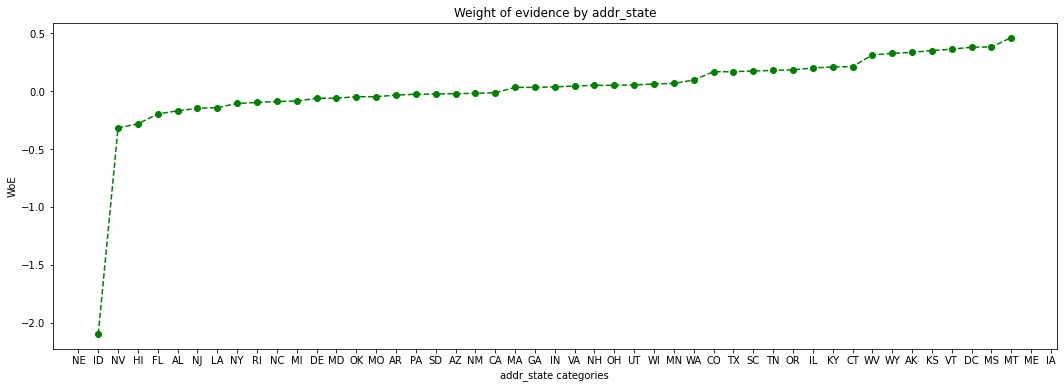

In [582]:
# We plot the weight of evidence values.
plot_woe(df_temp)

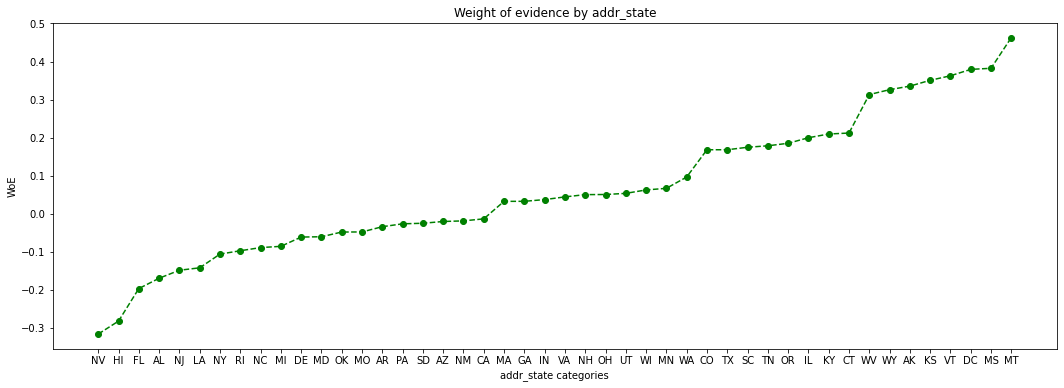

In [583]:
# We plot the weight of evidence values except G , F , B , A.
plot_woe(df_temp.iloc[2: -2, : ])

In [584]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [585]:
# We create the following categories:
# 'ND''NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### 3.6) Pre-processing discrete variables: Creating Dummy Variables of "verification_status"

In [586]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
display(df_temp)

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.872031    0.360734  29336.0  4305.0   
1     Source Verified  29963   0.895738    0.321295  26839.0  3124.0   
2        Not Verified  29653   0.906890    0.317971  26892.0  2761.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353161    0.422473 -0.179202             NaN       NaN  0.022684  
1     0.323101    0.306575  0.052501        0.023707  0.231704  0.022684  
2     0.323739    0.270952  0.177995        0.011152  0.125494  0.022684

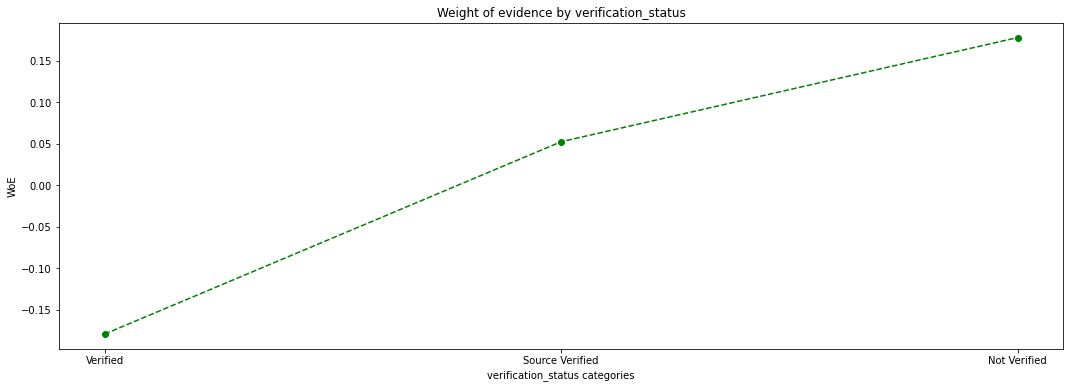

In [587]:
# We plot the weight of evidence values.
plot_woe(df_temp)

### 3.7) Pre-processing discrete variables: Creating Dummy Variables of "purpose"

In [588]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)

display(df_temp)

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational     89   0.752809    0.000954     67.0    22.0   
1     renewable_energy     70   0.771429    0.000751     54.0    16.0   
2       small_business   1431   0.777079    0.015345   1112.0   319.0   
3              medical    918   0.857298    0.009844    787.0   131.0   
4                house    439   0.858770    0.004707    377.0    62.0   
5                other   4806   0.861007    0.051535   4138.0   668.0   
6              wedding    456   0.864035    0.004890    394.0    62.0   
7               moving    602   0.878738    0.006455    529.0    73.0   
8             vacation    496   0.881048    0.005319    437.0    59.0   
9   debt_consolidation  55012   0.885916    0.589897  48736.0  6276.0   
10      major_purchase   1991   0.900552    0.021350   1793.0   198.0   
11    home_improvement   5299   0.906397    0.056821   4803.0   496.0   
12                 car   1072   0.916045    0.011495    982.0    90.0   
13         credit_card  20576   0.916505    0.220638  18858.0  1718.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000807    0.002159 -0.984590             NaN       NaN  0.045124  
1      0.000650    0.001570 -0.881845        0.018620  0.102745  0.045124  
2      0.013387    0.031305 -0.849516        0.005650  0.032329  0.045124  
3      0.009474    0.012856 -0.305210        0.080220  0.544307  0.045124  
4      0.004539    0.006084 -0.293130        0.001471  0.012080  0.045124  
5      0.049815    0.065554 -0.274561        0.002237  0.018569  0.045124  
6      0.004743    0.006084 -0.249024        0.003028  0.025537  0.045124  
7      0.006368    0.007164 -0.117712        0.014702  0.131312  0.045124  
8      0.005261    0.005790 -0.095845        0.002311  0.021867  0.045124  
9      0.586707    0.615898 -0.048556        0.004867  0.047289  0.045124  
10     0.021585    0.019431  0.105138        0.014637  0.153693  0.045124  
11     0.057821    0.048675  0.172179        0.005845  0.067042  0.045124  
12     0.011822    0.008832  0.291541        0.009647  0.119362  0.045124  
13     0.227022    0.168597  0.297536        0.000460  0.005995  0.045124

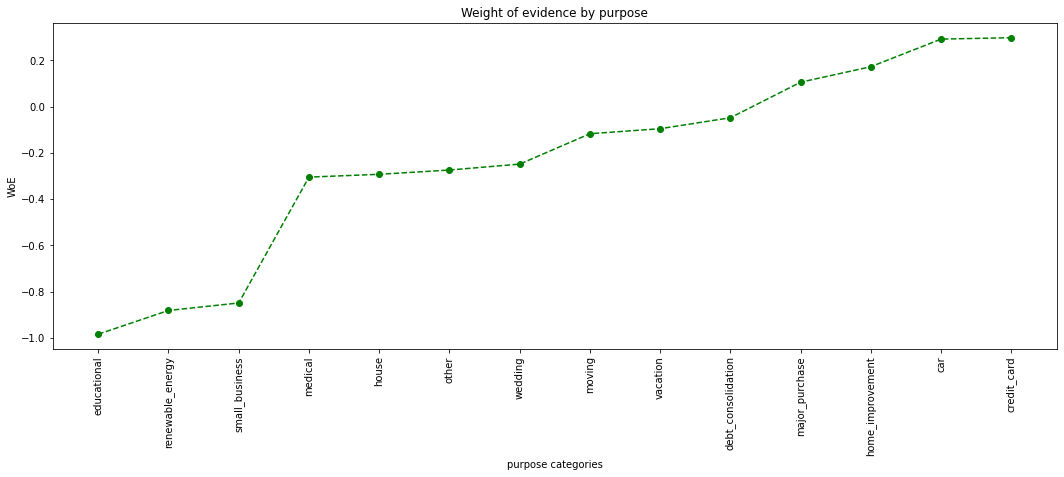

In [589]:
plot_woe(df_temp, 90)
# We plot the weight of evidence values.

In [590]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [591]:
### 3.8) Pre-processing discrete variables: Creating Dummy Variables of "initial_list_status"

In [592]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.879685    0.648648  53213.0  7278.0   
1                   w  32766   0.911127    0.351352  29854.0  2912.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.640603     0.71423 -0.108794             NaN       NaN  0.024888  
1     0.359397     0.28577  0.229238        0.031443  0.338032  0.024888

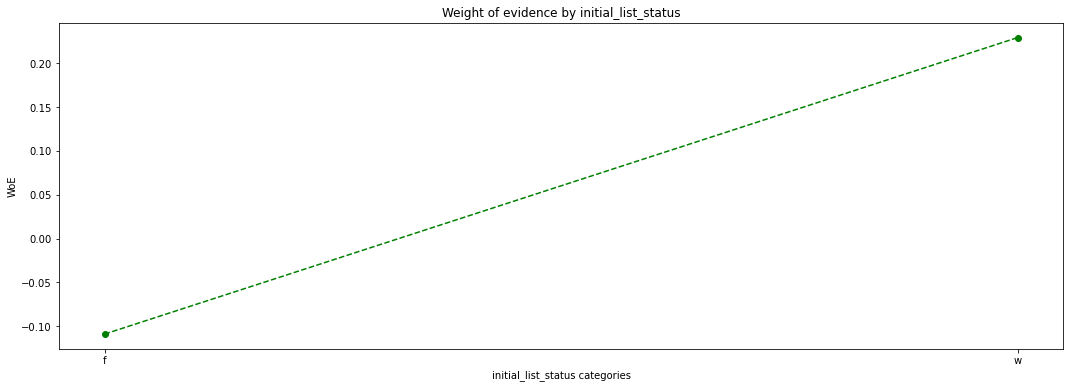

In [593]:
plot_woe(df_temp)
# We plot the weight of evidence values.

## 4) Pre-processing continuous variables: Automating Calculations and Visualizing Results

In [594]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### 4.1) Pre-processing continuous variables: Creating Dummy Variables of "term_months"

In [595]:
# term
df_inputs_prepr['term_months'].unique()
# There are only two unique values, 36 and 60.

array([60, 36], dtype=int64)

In [596]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_months', df_targets_prepr)
# We calculate weight of evidence.
df_temp

term_months  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           36  67534   0.902597    0.724171  60956.0  6578.0     0.733817   
1           60  25723   0.859581    0.275829  22111.0  3612.0     0.266183   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.645535  0.128181             NaN       NaN  0.036603  
1    0.354465 -0.286427        0.043016  0.414608  0.036603

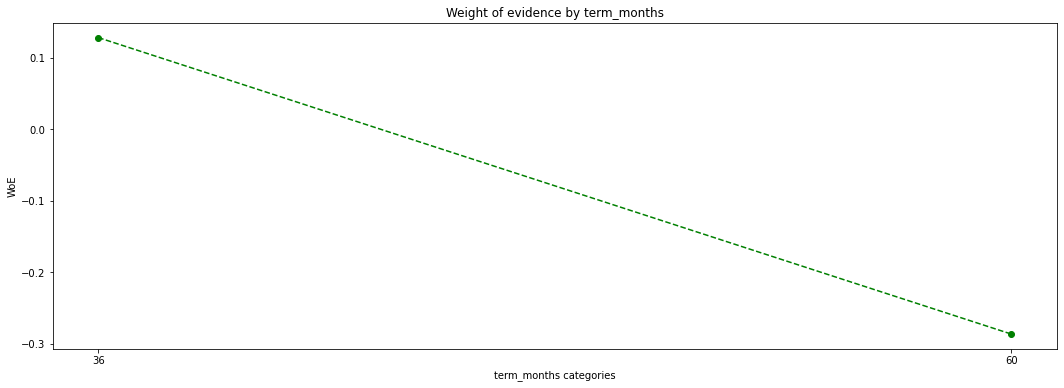

In [597]:
plot_woe(df_temp)
# We plot the weight of evidence values.

In [598]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_months'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_months'] == 60), 1, 0)

### 4.2) Pre-processing continuous variables: Creating Dummy Variables of "emp_length_int"

In [599]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9., nan,  3.,  6.,  4.,  7.,  8.,  5.])

In [600]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0   7353   0.880457    0.082565   6474.0   879.0   
1              1.0   5968   0.892594    0.067013   5327.0   641.0   
2              2.0   8295   0.887402    0.093143   7361.0   934.0   
3              3.0   7391   0.889325    0.082992   6573.0   818.0   
4              4.0   5555   0.889469    0.062376   4941.0   614.0   
5              5.0   6172   0.886261    0.069304   5470.0   702.0   
6              6.0   5225   0.878852    0.058670   4592.0   633.0   
7              7.0   5131   0.893588    0.057615   4585.0   546.0   
8              8.0   4542   0.890137    0.051001   4043.0   499.0   
9              9.0   3621   0.892847    0.040659   3233.0   388.0   
10            10.0  29804   0.900517    0.334662  26839.0  2965.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.081498    0.091382 -0.114472             NaN       NaN  0.005479  
1      0.067059    0.066639  0.006278        0.012137  0.120750  0.005479  
2      0.092663    0.097099 -0.046762        0.005192  0.053039  0.005479  
3      0.082744    0.085040 -0.027373        0.001923  0.019389  0.005479  
4      0.062199    0.063832 -0.025908        0.000144  0.001465  0.005479  
5      0.068859    0.072981 -0.058136        0.003208  0.032228  0.005479  
6      0.057806    0.065807 -0.129636        0.007409  0.071500  0.005479  
7      0.057718    0.056763  0.016690        0.014736  0.146326  0.005479  
8      0.050895    0.051876 -0.019100        0.003451  0.035790  0.005479  
9      0.040698    0.040337  0.008924        0.002711  0.028024  0.005479  
10     0.337861    0.308244  0.091742        0.007669  0.082819  0.005479

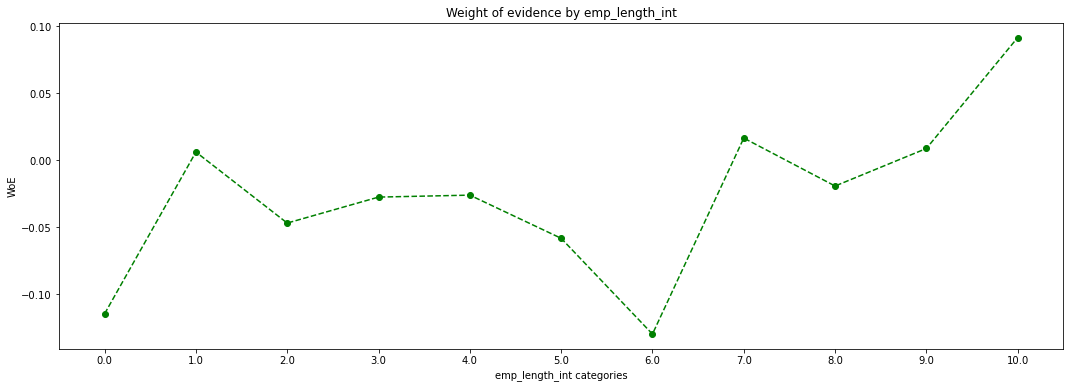

In [601]:
plot_woe(df_temp)
# We plot the weight of evidence values.

In [602]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [603]:
### 4.3) Pre-processing continuous variables: Creating Dummy Variables of "months_since_issue_d"

In [604]:
df_inputs_prepr['months_since_issue_d'].unique()

array([ 82.,  79., 107.,  78.,  99.,  91., 127.,  92.,  89., 100., 113.,
       118.,  88.,  87.,  97.,  96., 160., 104., 143.,  80.,  94.,  81.,
        93.,  84.,  90.,  98.,  86.,  77.,  95., 115.,  85., 114., 144.,
       111., 136., 130., 109., 123., 112., 117., 145., 106., 121., 132.,
       116., 108.,  83., 102., 105., 101., 126., 129., 151., 137., 119.,
       124., 110., 131., 103., 149., 120., 133., 159., 140., 122., 156.,
       138., 155., 157., 141., 134., 158., 147., 165., 142., 166., 128.,
       125., 135., 146., 150., 139., 148., 153., 154., 163., 152., 161.,
       162., 164., 167.])

In [605]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['months_since_issue_d_factor'] = pd.cut(df_inputs_prepr['months_since_issue_d'], 50)

In [606]:
display(df_inputs_prepr['months_since_issue_d_factor'])

362514      (80.6, 82.4]
288564      (78.8, 80.6]
213591    (105.8, 107.6]
263083     (76.91, 78.8]
165001     (98.6, 100.4]
82511       (89.6, 91.4]
24671     (125.6, 127.4]
97373       (91.4, 93.2]
44058       (87.8, 89.6]
351326      (80.6, 82.4]
176798     (98.6, 100.4]
2253      (111.2, 113.0]
11493     (116.6, 118.4]
247866     (76.91, 78.8]
465694      (87.8, 89.6]
440413      (86.0, 87.8]
340144      (80.6, 82.4]
145732      (96.8, 98.6]
171649     (98.6, 100.4]
135808      (95.0, 96.8]
42139     (159.8, 161.6]
196634    (102.2, 104.0]
41142     (141.8, 143.6]
310417      (78.8, 80.6]
274665      (78.8, 80.6]
269466      (78.8, 80.6]
1554      (111.2, 113.0]
455384      (87.8, 89.6]
121647      (93.2, 95.0]
261521     (76.91, 78.8]
259632     (76.91, 78.8]
115179      (93.2, 95.0]
93531       (91.4, 93.2]
93946       (91.4, 93.2]
278174      (78.8, 80.6]
314251      (78.8, 80.6]
317118      (80.6, 82.4]
106698      (91.4, 93.2]
390216      (82.4, 84.2]
396449      (82.4, 84.2]


In [607]:
# We calculate weight of evidence.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_issue_d_factor', df_targets_prepr)
display(df_temp)

months_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                (76.91, 78.8]   7191   0.945766    0.077109  6801.0  390.0   
1                 (78.8, 80.6]   9752   0.930373    0.104571  9073.0  679.0   
2                 (80.6, 82.4]   9506   0.919945    0.101933  8745.0  761.0   
3                 (82.4, 84.2]   7240   0.909116    0.077635  6582.0  658.0   
4                 (84.2, 86.0]   7217   0.902868    0.077388  6516.0  701.0   
5                 (86.0, 87.8]   3104   0.895296    0.033284  2779.0  325.0   
6                 (87.8, 89.6]   6197   0.890269    0.066451  5517.0  680.0   
7                 (89.6, 91.4]   5821   0.885930    0.062419  5157.0  664.0   
8                 (91.4, 93.2]   5021   0.878909    0.053840  4413.0  608.0   
9                 (93.2, 95.0]   4497   0.874138    0.048222  3931.0  566.0   
10                (95.0, 96.8]   2064   0.866279    0.022132  1788.0  276.0   
11                (96.8, 98.6]   3572   0.861422    0.038303  3077.0  495.0   
12               (98.6, 100.4]   2904   0.850895    0.031140  2471.0  433.0   
13              (100.4, 102.2]   2474   0.847615    0.026529  2097.0  377.0   
14              (102.2, 104.0]   2539   0.851910    0.027226  2163.0  376.0   
15              (104.0, 105.8]   1115   0.837668    0.011956   934.0  181.0   
16              (105.8, 107.6]   1721   0.816967    0.018454  1406.0  315.0   
17              (107.6, 109.4]   1296   0.852623    0.013897  1105.0  191.0   
18              (109.4, 111.2]   1097   0.839562    0.011763   921.0  176.0   
19              (111.2, 113.0]   1001   0.816184    0.010734   817.0  184.0   
20              (113.0, 114.8]    447   0.829978    0.004793   371.0   76.0   
21              (114.8, 116.6]    790   0.853165    0.008471   674.0  116.0   
22              (116.6, 118.4]    754   0.867374    0.008085   654.0  100.0   
23              (118.4, 120.2]    690   0.844928    0.007399   583.0  107.0   
24              (120.2, 122.0]    599   0.876461    0.006423   525.0   74.0   
25              (122.0, 123.8]    254   0.870079    0.002724   221.0   33.0   
26              (123.8, 125.6]    533   0.878049    0.005715   468.0   65.0   
27              (125.6, 127.4]    459   0.836601    0.004922   384.0   75.0   
28              (127.4, 129.2]    443   0.864560    0.004750   383.0   60.0   
29              (129.2, 131.0]    439   0.863326    0.004707   379.0   60.0   
30              (131.0, 132.8]    194   0.835052    0.002080   162.0   32.0   
31              (132.8, 134.6]    367   0.896458    0.003935   329.0   38.0   
32              (134.6, 136.4]    257   0.879377    0.002756   226.0   31.0   
33              (136.4, 138.2]    276   0.836957    0.002960   231.0   45.0   
34              (138.2, 140.0]    234   0.829060    0.002509   194.0   40.0   
35              (140.0, 141.8]    100   0.920000    0.001072    92.0    8.0   
36              (141.8, 143.6]    170   0.835294    0.001823   142.0   28.0   
37              (143.6, 145.4]    150   0.873333    0.001608   131.0   19.0   
38              (145.4, 147.2]    129   0.868217    0.001383   112.0   17.0   
39              (147.2, 149.0]    119   0.815126    0.001276    97.0   22.0   
40              (149.0, 150.8]     36   0.861111    0.000386    31.0    5.0   
41              (150.8, 152.6]     40   0.800000    0.000429    32.0    8.0   
42              (152.6, 154.4]     37   0.972973    0.000397    36.0    1.0   
43              (154.4, 156.2]     57   0.824561    0.000611    47.0   10.0   
44              (156.2, 158.0]    131   0.801527    0.001405   105.0   26.0   
45              (158.0, 159.8]     59   0.813559    0.000633    48.0   11.0   
46              (159.8, 161.6]     83   0.734940    0.000890    61.0   22.0   
47              (161.6, 163.4]     41   0.609756    0.000440    25.0   16.0   
48              (163.4, 165.2]     23   0.695652    0.000247    16.0    7.0   
49              (165.2, 167.0]     17   0.882353    0

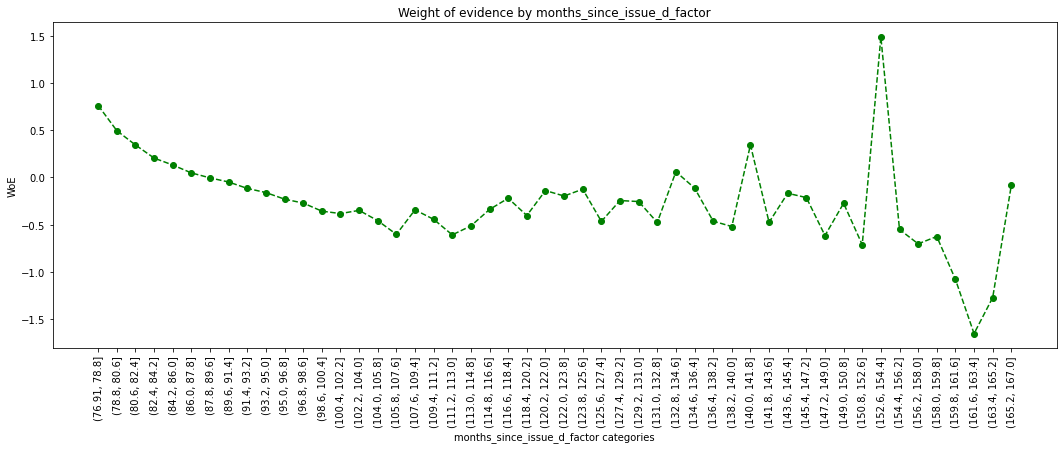

In [608]:
plot_woe(df_temp, 90)

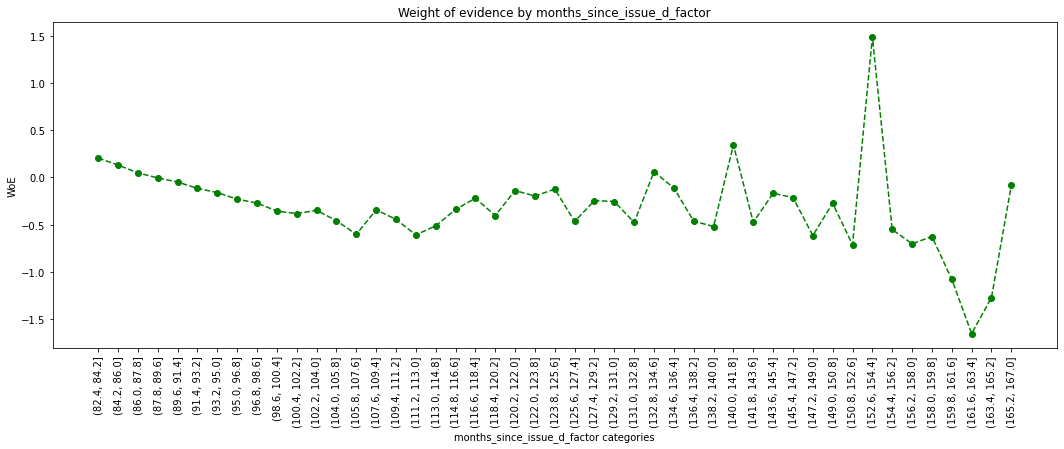

In [609]:
plot_woe(df_temp.iloc[3: , : ], 90)

In [610]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['months_since_issue_d:<38']   = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['months_since_issue_d:38-39'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['months_since_issue_d:40-41'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['months_since_issue_d:42-48'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['months_since_issue_d:49-52'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['months_since_issue_d:53-64'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['months_since_issue_d:65-84'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['months_since_issue_d:>84']   = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(85, int(df_inputs_prepr['months_since_issue_d'].max()))), 1, 0)

In [611]:
### 4.4) Pre-processing continuous variables: Creating Dummy Variables of "int_rate"

In [612]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [613]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
display(df_temp)

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.979866    0.022368  2044.0   42.0   
2     (6.246, 6.658]   1974   0.972138    0.021167  1919.0   55.0   
3     (6.658, 7.071]    477   0.951782    0.005115   454.0   23.0   
4     (7.071, 7.484]    804   0.981343    0.008621   789.0   15.0   
5     (7.484, 7.897]   3245   0.965485    0.034796  3133.0  112.0   
6      (7.897, 8.31]   2429   0.951009    0.026046  2310.0  119.0   
7      (8.31, 8.722]   1680   0.965476    0.018015  1622.0   58.0   
8     (8.722, 9.135]   2384   0.942114    0.025564  2246.0  138.0   
9     (9.135, 9.548]   1590   0.976730    0.017050  1553.0   37.0   
10    (9.548, 9.961]   1881   0.931419    0.020170  1752.0  129.0   
11   (9.961, 10.374]   2766   0.936370    0.029660  2590.0  176.0   
12  (10.374, 10.786]   1390   0.917986    0.014905  1276.0  114.0   
13  (10.786, 11.199]   4464   0.937500    0.047868  4185.0  279.0   
14  (11.199, 11.612]   1213   0.916735    0.013007  1112.0  101.0   
15  (11.612, 12.025]   3737   0.931496    0.040072  3481.0  256.0   
16  (12.025, 12.438]   3077   0.905752    0.032995  2787.0  290.0   
17   (12.438, 12.85]   2754   0.920116    0.029531  2534.0  220.0   
18   (12.85, 13.263]   5440   0.904044    0.058333  4918.0  522.0   
19  (13.263, 13.676]   3806   0.897793    0.040812  3417.0  389.0   
20  (13.676, 14.089]   2692   0.894874    0.028866  2409.0  283.0   
21  (14.089, 14.502]   5760   0.887153    0.061765  5110.0  650.0   
22  (14.502, 14.914]   1187   0.867734    0.012728  1030.0  157.0   
23  (14.914, 15.327]   4811   0.882145    0.051589  4244.0  567.0   
24   (15.327, 15.74]   3146   0.886840    0.033735  2790.0  356.0   
25   (15.74, 16.153]   1869   0.837346    0.020041  1565.0  304.0   
26  (16.153, 16.566]   3230   0.849226    0.034635  2743.0  487.0   
27  (16.566, 16.978]   1035   0.852174    0.011098   882.0  153.0   
28  (16.978, 17.391]   2843   0.848048    0.030486  2411.0  432.0   
29  (17.391, 17.804]   2992   0.837567    0.032083  2506.0  486.0   
30  (17.804, 18.217]    286   0.835664    0.003067   239.0   47.0   
31   (18.217, 18.63]   2729   0.827409    0.029263  2258.0  471.0   
32   (18.63, 19.042]   1835   0.820163    0.019677  1505.0  330.0   
33  (19.042, 19.455]   1135   0.786784    0.012171   893.0  242.0   
34  (19.455, 19.868]   1680   0.816667    0.018015  1372.0  308.0   
35  (19.868, 20.281]   1244   0.849678    0.013339  1057.0  187.0   
36  (20.281, 20.694]    805   0.814907    0.008632   656.0  149.0   
37  (20.694, 21.106]    956   0.791841    0.010251   757.0  199.0   
38  (21.106, 21.519]    701   0.757489    0.007517   531.0  170.0   
39  (21.519, 21.932]    222   0.801802    0.002381   178.0   44.0   
40  (21.932, 22.345]    832   0.775240    0.008922   645.0  187.0   
41  (22.345, 22.758]    586   0.737201    0.006284   432.0  154.0   
42   (22.758, 23.17]    375   0.741333    0.004021   278.0   97.0   
43   (23.17, 23.583]    655   0.778626    0.007024   510.0  145.0   
44  (23.583, 23.996]    408   0.750000    0.004375   306.0  102.0   
45  (23.996, 24.409]    393   0.834606    0.004214   328.0   65.0   
46  (24.409, 24.822]    436   0.786697    0.004675   343.0   93.0   
47  (24.822, 25.234]    351   0.792023    0.003764   278.0   73.0   
48  (25.234, 25.647]    194   0.757732    0.002080   147.0   47.0   
49   (25.647, 26.06]    474   0.738397    0.005083   350.0  124.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002311    0.000589  1.367495             NaN       NaN  0.371465  
1      0.024607    0.004122  1.786754        0.010169  0.419258  0.371465  
2      0.023102    0.005397  1.453986        0.007728  0.332768  0.371465  
3      0.005465    0.002257  0.884362        0.020356  0.569623  0.371465  
4      0.009498    0.001472  1.864475        0.029561  0.980113  0.371465  
5      0.037717    0.010991  

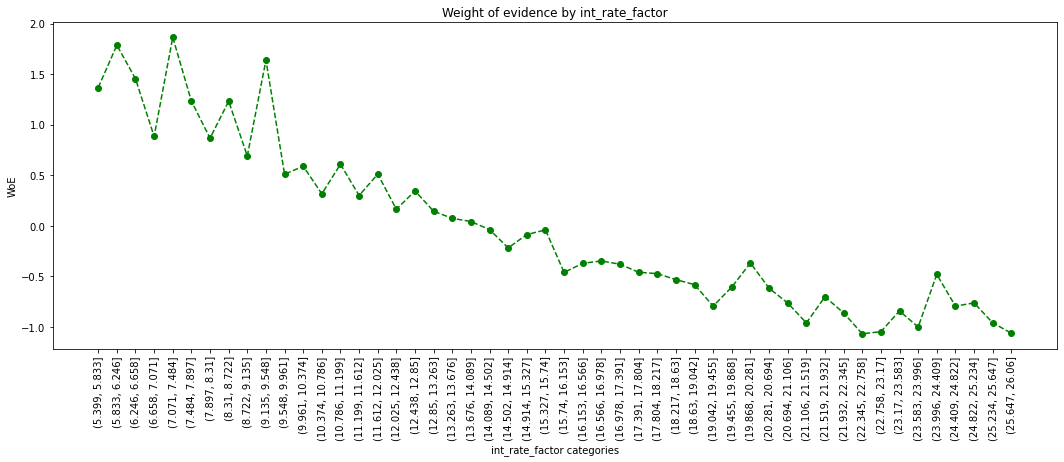

In [614]:
plot_woe(df_temp, 90)

In [615]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [616]:
### 4.5) Pre-processing continuous variables: Creating Dummy Variables of "funded_amnt"

In [617]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)

display(df_temp)

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.880878    0.003421   281.0   38.0   
1     (1190.0, 1880.0]    800   0.896250    0.008578   717.0   83.0   
2     (1880.0, 2570.0]   1513   0.900198    0.016224  1362.0  151.0   
3     (2570.0, 3260.0]   1817   0.893781    0.019484  1624.0  193.0   
4     (3260.0, 3950.0]   1245   0.891566    0.013350  1110.0  135.0   
5     (3950.0, 4640.0]   2298   0.882942    0.024642  2029.0  269.0   
6     (4640.0, 5330.0]   3957   0.898155    0.042431  3554.0  403.0   
7     (5330.0, 6020.0]   4186   0.906593    0.044887  3795.0  391.0   
8     (6020.0, 6710.0]   1718   0.881839    0.018422  1515.0  203.0   
9     (6710.0, 7400.0]   2880   0.893403    0.030882  2573.0  307.0   
10    (7400.0, 8090.0]   4266   0.895218    0.045745  3819.0  447.0   
11    (8090.0, 8780.0]   1617   0.890538    0.017339  1440.0  177.0   
12    (8780.0, 9470.0]   2320   0.888793    0.024877  2062.0  258.0   
13   (9470.0, 10160.0]   8552   0.891955    0.091704  7628.0  924.0   
14  (10160.0, 10850.0]   1642   0.872716    0.017607  1433.0  209.0   
15  (10850.0, 11540.0]   2091   0.880918    0.022422  1842.0  249.0   
16  (11540.0, 12230.0]   5767   0.906190    0.061840  5226.0  541.0   
17  (12230.0, 12920.0]   1228   0.875407    0.013168  1075.0  153.0   
18  (12920.0, 13610.0]   1860   0.898925    0.019945  1672.0  188.0   
19  (13610.0, 14300.0]   2087   0.899377    0.022379  1877.0  210.0   
20  (14300.0, 14990.0]   1255   0.886853    0.013457  1113.0  142.0   
21  (14990.0, 15680.0]   5441   0.903143    0.058344  4914.0  527.0   
22  (15680.0, 16370.0]   2920   0.882534    0.031311  2577.0  343.0   
23  (16370.0, 17060.0]   1625   0.880000    0.017425  1430.0  195.0   
24  (17060.0, 17750.0]    921   0.850163    0.009876   783.0  138.0   
25  (17750.0, 18440.0]   2898   0.885783    0.031075  2567.0  331.0   
26  (18440.0, 19130.0]    989   0.858443    0.010605   849.0  140.0   
27  (19130.0, 19820.0]   1057   0.875118    0.011334   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.896736    0.054205  4533.0  522.0   
29  (20510.0, 21200.0]   1635   0.895413    0.017532  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.834034    0.005104   397.0   79.0   
31  (21890.0, 22580.0]   1028   0.883268    0.011023   908.0  120.0   
32  (22580.0, 23270.0]    633   0.892575    0.006788   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022    0.005329   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.898033    0.026711  2237.0  254.0   
35  (24650.0, 25340.0]   2500   0.903200    0.026808  2258.0  242.0   
36  (25340.0, 26030.0]    487   0.852156    0.005222   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742    0.003206   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732    0.004396   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885    0.017200  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843    0.002188   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154    0.003067   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682    0.018894  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068    0.001426   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275    0.002338   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981    0.003935   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892    0.001491   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818    0.002949   248.0   27.0   
48  (33620.0, 34310.0]    142   0.894366    0.001523   127.0   15.0   
49  (34310.0, 35000.0]   3347   0.880789    0.035890  2948.0  399.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003383    0.003729 -0.097472             NaN       NaN  0.018663  
1      0.008632    0.008145  0.057995        0.015372  0.155467  0.018663  
2      0.016396    0.014818  0.101189        0.003948  0.043194  0.018663  
3      0.019550    0.018940  0.031717        0.006417  0.069472  0.018663  
4 

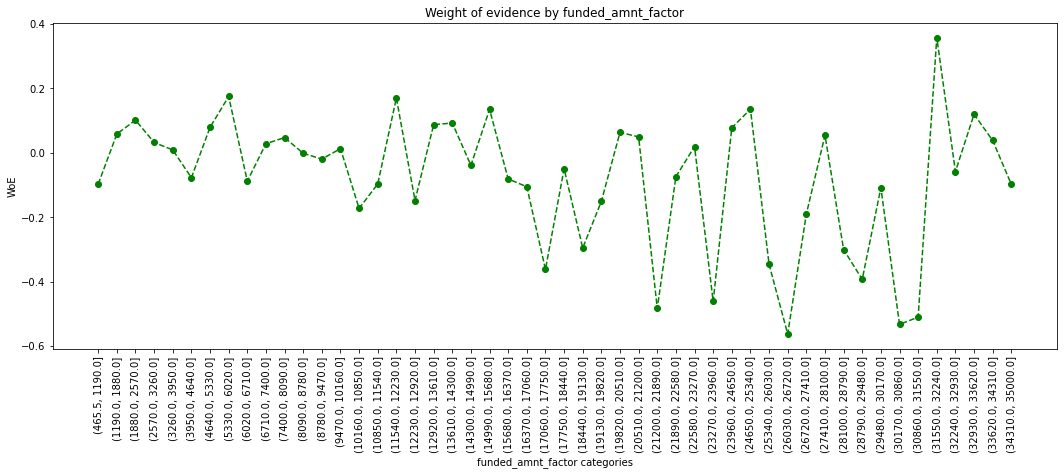

In [618]:
plot_woe(df_temp, 90)

In [619]:
# can't create dummy variables of funded_amnt because categories doesn't have nearly similar WoE 
# there is no clear pattern between independent variable and woe
# i.e woe varies greatly

In [620]:
### 4.6) Pre-processing continuous variables: Creating Dummy Variables of "months_since_earliest_cr_line"

In [621]:
# months_since_earliest_cr_line

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)

# We calculate weight of evidence.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
display(df_temp)

months_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (113.486, 124.28]    216   0.930556    0.002316   201.0   
1                      (124.28, 134.56]    474   0.909283    0.005083   431.0   
2                      (134.56, 144.84]    588   0.862245    0.006305   507.0   
3                      (144.84, 155.12]   1029   0.856171    0.011035   881.0   
4                       (155.12, 165.4]   1632   0.868873    0.017501  1418.0   
5                       (165.4, 175.68]   2238   0.856122    0.023999  1916.0   
6                      (175.68, 185.96]   2613   0.873708    0.028021  2283.0   
7                      (185.96, 196.24]   3165   0.880885    0.033940  2788.0   
8                      (196.24, 206.52]   3558   0.890388    0.038155  3168.0   
9                       (206.52, 216.8]   4140   0.886957    0.044396  3672.0   
10                      (216.8, 227.08]   4963   0.890993    0.053221  4422.0   
11                     (227.08, 237.36]   5402   0.884857    0.057929  4780.0   
12                     (237.36, 247.64]   5792   0.881388    0.062111  5105.0   
13                     (247.64, 257.92]   5743   0.891694    0.061586  5121.0   
14                      (257.92, 268.2]   5835   0.880206    0.062572  5136.0   
15                      (268.2, 278.48]   4882   0.888775    0.052353  4339.0   
16                     (278.48, 288.76]   4131   0.887436    0.044299  3666.0   
17                     (288.76, 299.04]   4210   0.891924    0.045146  3755.0   
18                     (299.04, 309.32]   3787   0.889886    0.040610  3370.0   
19                      (309.32, 319.6]   3385   0.897194    0.036299  3037.0   
20                      (319.6, 329.88]   3111   0.899068    0.033361  2797.0   
21                     (329.88, 340.16]   2790   0.907168    0.029919  2531.0   
22                     (340.16, 350.44]   1962   0.901121    0.021040  1768.0   
23                     (350.44, 360.72]   1794   0.901895    0.019238  1618.0   
24                      (360.72, 371.0]   1914   0.900209    0.020525  1723.0   
25                      (371.0, 381.28]   1780   0.902809    0.019088  1607.0   
26                     (381.28, 391.56]   1509   0.901922    0.016182  1361.0   
27                     (391.56, 401.84]   1389   0.903528    0.014895  1255.0   
28                     (401.84, 412.12]   1346   0.918276    0.014434  1236.0   
29                      (412.12, 422.4]   1011   0.901088    0.010842   911.0   
30                      (422.4, 432.68]    891   0.905724    0.009555   807.0   
31                     (432.68, 442.96]    892   0.913677    0.009565   815.0   
32                     (442.96, 453.24]    775   0.916129    0.008311   710.0   
33                     (453.24, 463.52]    671   0.928465    0.007196   623.0   
34                      (463.52, 473.8]    462   0.893939    0.004954   413.0   
35                      (473.8, 484.08]    379   0.910290    0.004064   345.0   
36                     (484.08, 494.36]    286   0.919580    0.003067   263.0   
37                     (494.36, 504.64]    330   0.927273    0.003539   306.0   
38                     (504.64, 514.92]    332   0.906627    0.003560   301.0   
39                      (514.92, 525.2]    319   0.918495    0.003421   293.0   
40                      (525.2, 535.48]    224   0.924107    0.002402   207.0   
41                     (535.48, 545.76]    207   0.937198    0.002220   194.0   
42                     (545.76, 556.04]    168   0.910714    0.001802   153.0   
43                     (556.04, 566.32]    127   0.913386    0.001362   116.0   
44                      (566.32, 576.6]    122   0.926230    0.001308   113.0   
45                      (576.6, 586.88]    131   0.908397    0.001405   119.0   
46                     (586.88, 597.16]    108   0.925926    0.001158   100.0   
47                     (597.16, 607.44]     69   0.869565    0.000740    60.0   
48                     (607.44, 61

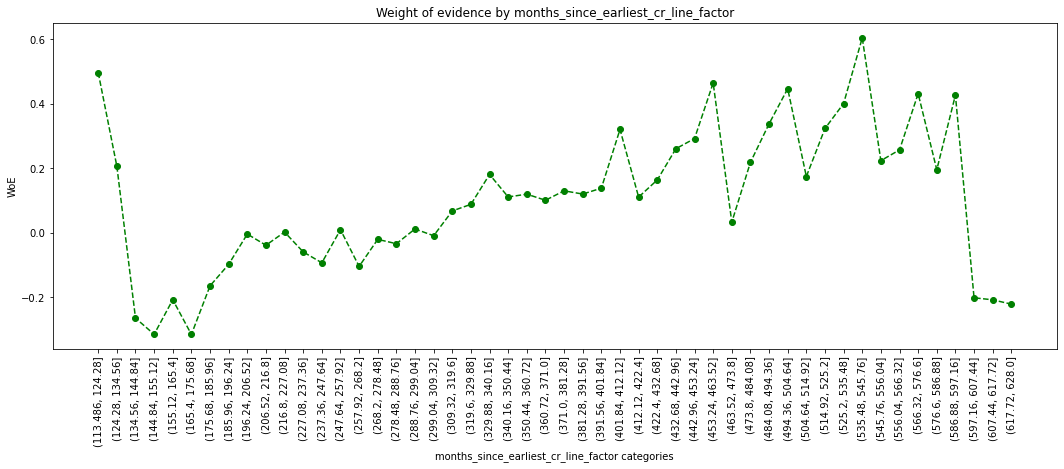

In [622]:
plot_woe(df_temp, 90)

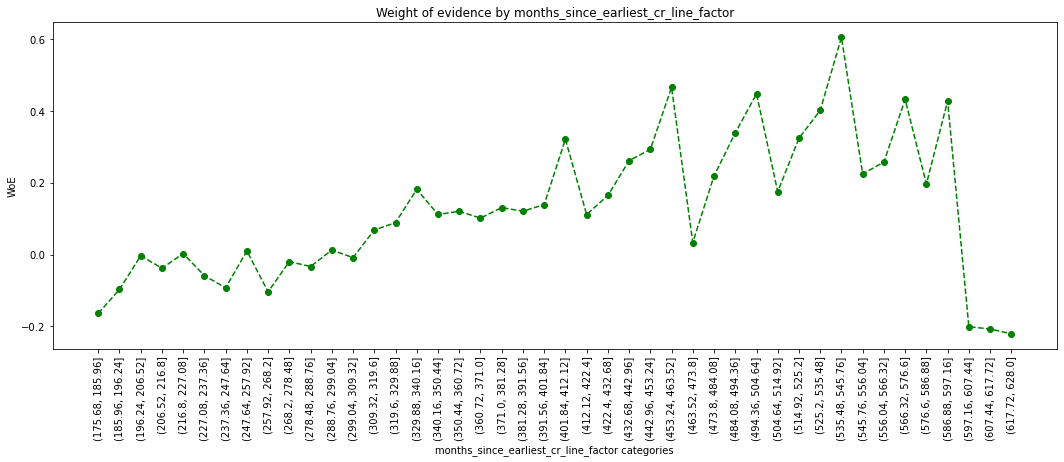

In [623]:
plot_woe(df_temp.iloc[6: , : ], 90)

In [624]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['months_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['months_since_earliest_cr_line'].max()))), 1, 0)

In [625]:
### 4.7) Pre-processing continuous variables: Creating Dummy Variables of "delinq_2yrs"

In [626]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
display(df_temp)

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  76561   0.890937    0.821012  68211.0  8350.0     0.821206   
1           1.0  11297   0.890413    0.121145  10059.0  1238.0     0.121102   
2           2.0   3192   0.885025    0.034230   2825.0   367.0     0.034011   
3           3.0   1134   0.893298    0.012161   1013.0   121.0     0.012196   
4           4.0    510   0.886275    0.005469    452.0    58.0     0.005442   
5           5.0    270   0.911111    0.002895    246.0    24.0     0.002962   
6           6.0    128   0.859375    0.001373    110.0    18.0     0.001324   
7           7.0     67   0.925373    0.000718     62.0     5.0     0.000746   
8           8.0     29   0.896552    0.000311     26.0     3.0     0.000313   
9           9.0     22   0.954545    0.000236     21.0     1.0     0.000253   
10         10.0      9   0.888889    0.000097      8.0     1.0     0.000096   
11         11.0     10   1.000000    0.000107     10.0     0.0     0.000120   
12         12.0      8   0.625000    0.000086      5.0     3.0     0.000060   
13         13.0      7   0.857143    0.000075      6.0     1.0     0.000072   
14         14.0      2   1.000000    0.000021      2.0     0.0     0.000024   
15         15.0      1   1.000000    0.000011      1.0     0.0     0.000012   
16         16.0      1   1.000000    0.000011      1.0     0.0     0.000012   
17         18.0      3   1.000000    0.000032      3.0     0.0     0.000036   
18         19.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.819431  0.002164             NaN       NaN  inf  
1     0.121492 -0.003210        0.000523  0.005374  inf  
2     0.036016 -0.057279        0.005388  0.054069  inf  
3     0.011874  0.026700        0.008273  0.083979  inf  
4     0.005692 -0.044941        0.007024  0.071642  inf  
5     0.002355  0.229097        0.024837  0.274039  inf  
6     0.001766 -0.288072        0.051736  0.517169  inf  
7     0.000491  0.419516        0.065998  0.707588  inf  
8     0.000294  0.061304        0.028821  0.358212  inf  
9     0.000098  0.946342        0.057994  0.885038  inf  
10    0.000098 -0.018739        0.065657  0.965081  inf  
11    0.000000       inf        0.111111       inf  inf  
12    0.000294 -1.587355        0.375000       inf  inf  
13    0.000098 -0.306421        0.232143  1.280934  inf  
14    0.000000       inf        0.142857       inf  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf

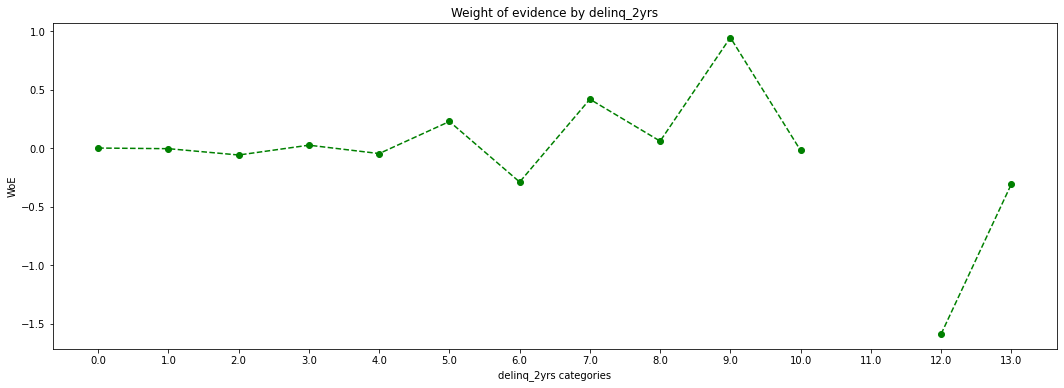

In [627]:
plot_woe(df_temp)

In [628]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [629]:
### 4.8) Pre-processing continuous variables: Creating Dummy Variables of "inq_last_6mths"

In [630]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)

display(df_temp)

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48290   0.910085    0.517844  43948.0  4342.0   
1              1.0  25985   0.882394    0.278654  22929.0  3056.0   
2              2.0  11611   0.861252    0.124512  10000.0  1611.0   
3              3.0   5086   0.846245    0.054540   4304.0   782.0   
4              4.0   1431   0.841370    0.015346   1204.0   227.0   
5              5.0    551   0.842105    0.005909    464.0    87.0   
6              6.0    211   0.763033    0.002263    161.0    50.0   
7              7.0     36   0.527778    0.000386     19.0    17.0   
8              8.0     21   0.523810    0.000225     11.0    10.0   
9              9.0      7   0.428571    0.000075      3.0     4.0   
10            10.0      7   0.857143    0.000075      6.0     1.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   0.000000    0.000011      0.0     1.0   
14            14.0      1   0.000000    0.000011      0.0     1.0   
15            18.0      2   0.500000    0.000021      1.0     1.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.529099    0.426104  0.216492             NaN       NaN  inf  
1      0.276047    0.299902 -0.082885        0.027691  0.299376  inf  
2      0.120392    0.158096 -0.272450        0.021141  0.189566  inf  
3      0.051817    0.076742 -0.392735        0.015008  0.120285  inf  
4      0.014495    0.022277 -0.429726        0.004875  0.036991  inf  
5      0.005586    0.008538 -0.424204        0.000736  0.005522  inf  
6      0.001938    0.004907 -0.928799        0.079072  0.504595  inf  
7      0.000229    0.001668 -1.986955        0.235255  1.058156  inf  
8      0.000132    0.000981 -2.002870        0.003968  0.015915  inf  
9      0.000036    0.000393 -2.385863        0.095238  0.382992  inf  
10     0.000072    0.000098 -0.306421        0.428571  2.079442  inf  
11     0.000084    0.000000       inf        0.142857       inf  inf  
12     0.000036    0.000000       inf        0.000000       NaN  inf  
13     0.000000    0.000098      -inf        1.000000       inf  inf  
14     0.000000    0.000098      -inf        0.000000       NaN  inf  
15     0.000012    0.000098 -2.098180        0.500000       inf  inf  
16     0.000012    0.000000       inf        0.500000       inf  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

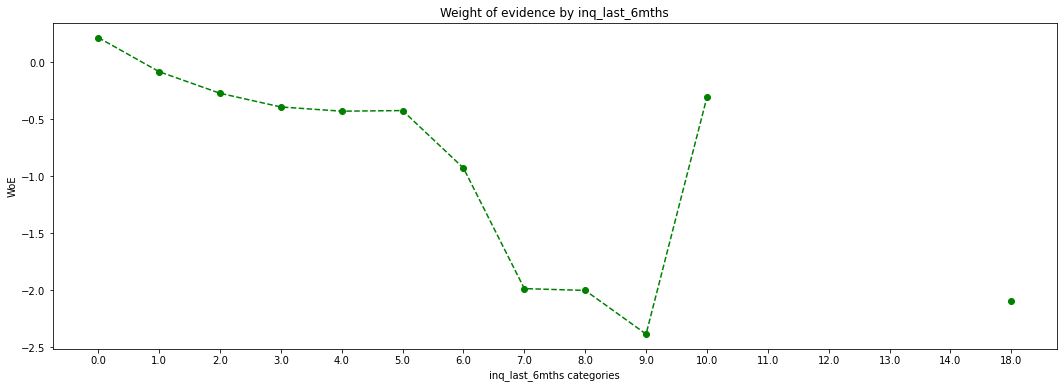

In [631]:
plot_woe(df_temp)

In [632]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [633]:
### 4.9) Pre-processing continuous variables: Creating Dummy Variables of "open_acc"

In [634]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)

display(df_temp)

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      2   1.000000    0.000021     2.0    0.0     0.000024   
1        1.0     32   0.875000    0.000343    28.0    4.0     0.000337   
2        2.0    334   0.838323    0.003582   280.0   54.0     0.003371   
3        3.0   1122   0.852941    0.012032   957.0  165.0     0.011522   
4        4.0   2560   0.892188    0.027452  2284.0  276.0     0.027498   
5        5.0   4403   0.891438    0.047216  3925.0  478.0     0.047254   
6        6.0   6216   0.890766    0.066658  5537.0  679.0     0.066661   
7        7.0   7433   0.886856    0.079709  6592.0  841.0     0.079362   
8        8.0   8314   0.893433    0.089156  7428.0  886.0     0.089427   
9        9.0   8768   0.888230    0.094025  7788.0  980.0     0.093761   
10      10.0   8576   0.889109    0.091966  7625.0  951.0     0.091799   
11      11.0   7740   0.894444    0.083001  6923.0  817.0     0.083347   
12      12.0   6886   0.887017    0.073843  6108.0  778.0     0.073535   
13      13.0   5914   0.893304    0.063420  5283.0  631.0     0.063603   
14      14.0   4960   0.895766    0.053189  4443.0  517.0     0.053490   
15      15.0   4006   0.892162    0.042959  3574.0  432.0     0.043028   
16      16.0   3269   0.898134    0.035056  2936.0  333.0     0.035347   
17      17.0   2680   0.886940    0.028739  2377.0  303.0     0.028617   
18      18.0   2259   0.902169    0.024225  2038.0  221.0     0.024536   
19      19.0   1811   0.893429    0.019420  1618.0  193.0     0.019479   
20      20.0   1444   0.898199    0.015485  1297.0  147.0     0.015615   
21      21.0   1037   0.880424    0.011120   913.0  124.0     0.010992   
22      22.0    784   0.887755    0.008407   696.0   88.0     0.008379   
23      23.0    628   0.904459    0.006734   568.0   60.0     0.006838   
24      24.0    473   0.890063    0.005072   421.0   52.0     0.005069   
25      25.0    391   0.882353    0.004193   345.0   46.0     0.004154   
26      26.0    250   0.884000    0.002681   221.0   29.0     0.002661   
27      27.0    204   0.911765    0.002188   186.0   18.0     0.002239   
28      28.0    153   0.895425    0.001641   137.0   16.0     0.001649   
29      29.0    128   0.843750    0.001373   108.0   20.0     0.001300   
30      30.0    107   0.906542    0.001147    97.0   10.0     0.001168   
31      31.0     73   0.890411    0.000783    65.0    8.0     0.000783   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000710   
33      33.0     47   0.851064    0.000504    40.0    7.0     0.000482   
34      34.0     40   0.825000    0.000429    33.0    7.0     0.000397   
35      35.0     33   0.939394    0.000354    31.0    2.0     0.000373   
36      36.0     22   0.772727    0.000236    17.0    5.0     0.000205   
37      37.0     21   0.857143    0.000225    18.0    3.0     0.000217   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000157   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000132   
40      40.0      9   0.555556    0.000097     5.0    4.0     0.000060   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000072   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000084   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000048   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000048   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

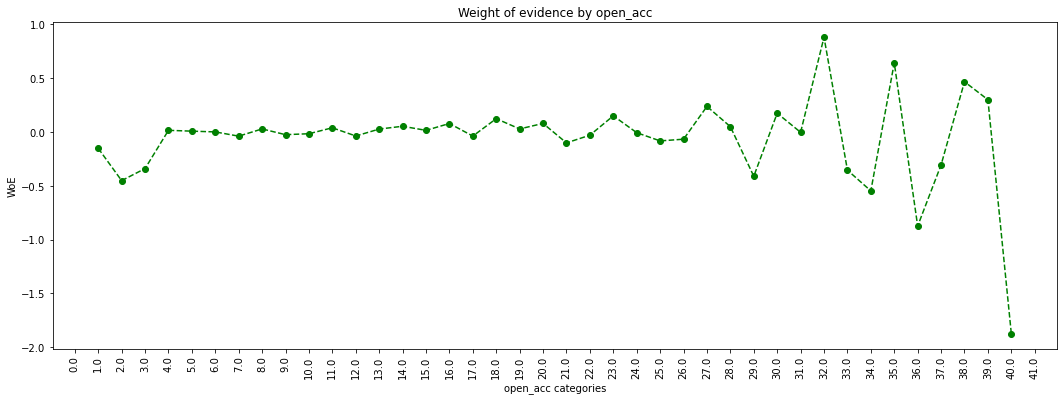

In [635]:
plot_woe(df_temp, 90)

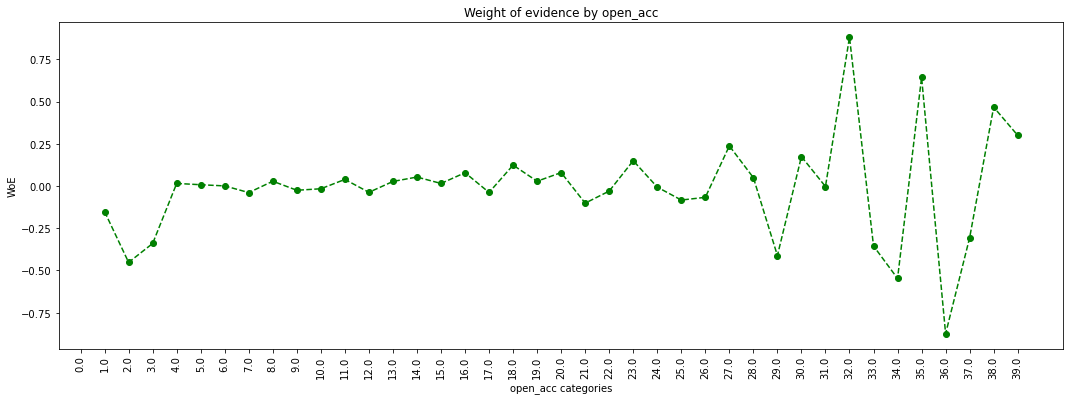

In [636]:
plot_woe(df_temp.iloc[ : 40, :], 90)

In [637]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [638]:
### 4.10) Pre-processing continuous variables: Creating Dummy Variables of "pub_rec"

In [639]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
display(df_temp)

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80918   0.889172    0.867735  71950.0  8968.0     0.866220   
1       1.0  10670   0.901125    0.114421   9615.0  1055.0     0.115757   
2       2.0   1097   0.904284    0.011764    992.0   105.0     0.011943   
3       3.0    331   0.900302    0.003550    298.0    33.0     0.003588   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001156   
5       5.0     73   0.904110    0.000783     66.0     7.0     0.000795   
6       6.0     19   0.894737    0.000204     17.0     2.0     0.000205   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000132   
8       8.0      5   0.800000    0.000054      4.0     1.0     0.000048   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000060   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.880079 -0.015872             NaN       NaN  inf  
1     0.103533  0.111603        0.011953  0.127475  inf  
2     0.010304  0.147582        0.003160  0.035979  inf  
3     0.003238  0.102405        0.003982  0.045177  inf  
4     0.001570 -0.306421        0.043159  0.408826  inf  
5     0.000687  0.145564        0.046967  0.451985  inf  
6     0.000196  0.041886        0.009373  0.103678  inf  
7     0.000294 -0.798897        0.109023  0.840783  inf  
8     0.000098 -0.711886        0.014286  0.087011  inf  
9     0.000000       inf        0.200000       inf  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

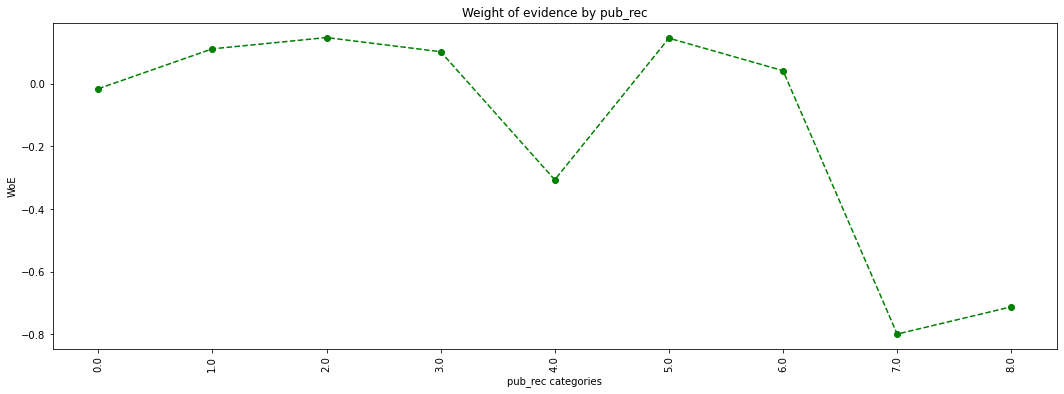

In [640]:
plot_woe(df_temp, 90)

In [641]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [642]:
### 4.11) Pre-processing continuous variables: Creating Dummy Variables of "total_acc"

In [643]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)

display(df_temp)

total_acc_factor  n_obs  prop_good  prop_n_obs  n_good   n_bad  \
0      (0.845, 4.1]    405   0.819753    0.004343   332.0    73.0   
1        (4.1, 7.2]   2172   0.855433    0.023292  1858.0   314.0   
2       (7.2, 10.3]   4576   0.878278    0.049071  4019.0   557.0   
3      (10.3, 13.4]   7113   0.878392    0.076277  6248.0   865.0   
4      (13.4, 16.5]   8745   0.887136    0.093778  7758.0   987.0   
5      (16.5, 19.6]  10078   0.889462    0.108073  8964.0  1114.0   
6      (19.6, 22.7]  10333   0.898093    0.110807  9280.0  1053.0   
7      (22.7, 25.8]   9735   0.889985    0.104395  8664.0  1071.0   
8      (25.8, 28.9]   8711   0.893468    0.093414  7783.0   928.0   
9      (28.9, 32.0]   9508   0.895667    0.101960  8516.0   992.0   
10     (32.0, 35.1]   5668   0.902788    0.060782  5117.0   551.0   
11     (35.1, 38.2]   4324   0.900324    0.046369  3893.0   431.0   
12     (38.2, 41.3]   3375   0.898963    0.036192  3034.0   341.0   
13     (41.3, 44.4]   2576   0.888975    0.027624  2290.0   286.0   
14     (44.4, 47.5]   1742   0.900115    0.018681  1568.0   174.0   
15     (47.5, 50.6]   1273   0.889238    0.013651  1132.0   141.0   
16     (50.6, 53.7]    942   0.918259    0.010102   865.0    77.0   
17     (53.7, 56.8]    640   0.893750    0.006863   572.0    68.0   
18     (56.8, 59.9]    428   0.873832    0.004590   374.0    54.0   
19     (59.9, 63.0]    657   0.856925    0.007045   563.0    94.0   
20     (63.0, 66.1]     71   0.943662    0.000761    67.0     4.0   
21     (66.1, 69.2]     57   0.929825    0.000611    53.0     4.0   
22     (69.2, 72.3]     30   0.933333    0.000322    28.0     2.0   
23     (72.3, 75.4]     27   1.000000    0.000290    27.0     0.0   
24     (75.4, 78.5]     16   0.875000    0.000172    14.0     2.0   
25     (78.5, 81.6]     13   0.769231    0.000139    10.0     3.0   
26     (81.6, 84.7]     11   0.909091    0.000118    10.0     1.0   
27     (84.7, 87.8]      8   0.875000    0.000086     7.0     1.0   
28     (87.8, 90.9]      6   0.833333    0.000064     5.0     1.0   
29     (90.9, 94.0]      8   0.875000    0.000086     7.0     1.0   
30     (94.0, 97.1]      1   1.000000    0.000011     1.0     0.0   
31    (97.1, 100.2]      2   1.000000    0.000021     2.0     0.0   
32   (100.2, 103.3]      0        NaN    0.000000     NaN     NaN   
33   (103.3, 106.4]      0        NaN    0.000000     NaN     NaN   
34   (106.4, 109.5]      0        NaN    0.000000     NaN     NaN   
35   (109.5, 112.6]      0        NaN    0.000000     NaN     NaN   
36   (112.6, 115.7]      0        NaN    0.000000     NaN     NaN   
37   (115.7, 118.8]      0        NaN    0.000000     NaN     NaN   
38   (118.8, 121.9]      0        NaN    0.000000     NaN     NaN   
39   (121.9, 125.0]      0        NaN    0.000000     NaN     NaN   
40   (125.0, 128.1]      0        NaN    0.000000     NaN     NaN   
41   (128.1, 131.2]      0        NaN    0.000000     NaN     NaN   
42   (131.2, 134.3]      0        NaN    0.000000     NaN     NaN   
43   (134.3, 137.4]      0        NaN    0.000000     NaN     NaN   
44   (137.4, 140.5]      0        NaN    0.000000     NaN     NaN   
45   (140.5, 143.6]      0        NaN    0.000000     NaN     NaN   
46   (143.6, 146.7]      0        NaN    0.000000     NaN     NaN   
47   (146.7, 149.8]      0        NaN    0.000000     NaN     NaN   
48   (149.8, 152.9]      0        NaN    0.000000     NaN     NaN   
49   (152.9, 156.0]      1   1.000000    0.000011     1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.003997    0.007164 -0.583505             NaN       NaN  inf  
1      0.022369    0.030815 -0.320318        0.035680  0.263187  inf  
2      0.048386    0.054661 -0.121957        0.022845  0.198360  inf  
3      0.075221    0.084887 -0.120893        0.000114  0.001064  inf  
4      0.093400    0.096860 -0.036371        0.008744  0.084523  inf  
5      0.107919    0.109323 -0.012921        0.002327  0.

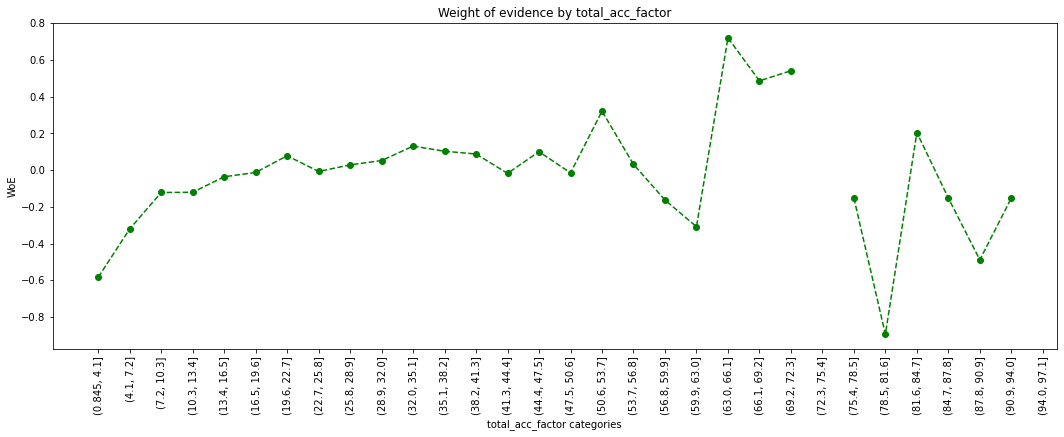

In [644]:
plot_woe(df_temp, 90)

In [645]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [646]:
### 4.12) Pre-processing continuous variables: Creating Dummy Variables of "acc_now_delinq"

In [647]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
display(df_temp)

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0             0.0  92866   0.890821    0.995861  82727.0  10139.0   
1             1.0    360   0.872222    0.003861    314.0     46.0   
2             2.0     22   0.818182    0.000236     18.0      4.0   
3             3.0      4   0.750000    0.000043      3.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.995967    0.994995  0.000976             NaN       NaN  0.000298  
1     0.003780    0.004514 -0.177429        0.018599  0.178405  0.000298  
2     0.000217    0.000393 -0.594103        0.054040  0.416674  0.000298  
3     0.000036    0.000098 -0.999568        0.068182  0.405465  0.000298

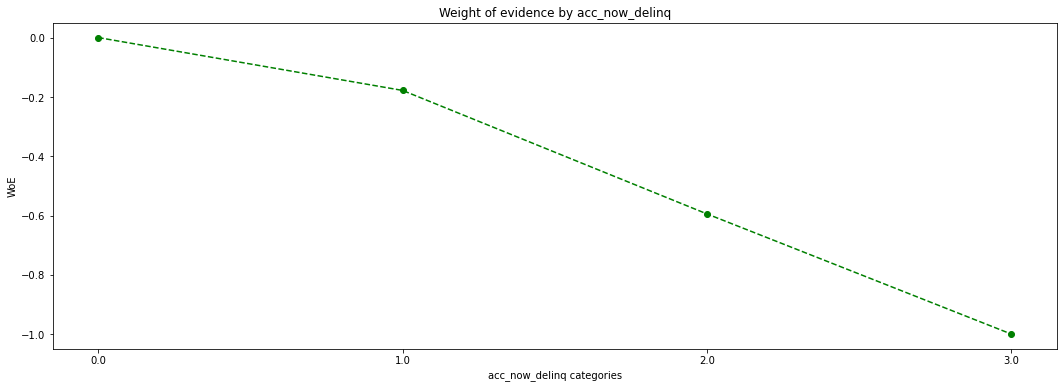

In [648]:
plot_woe(df_temp)

In [649]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [650]:
### 4.13) Pre-processing continuous variables: Creating Dummy Variables of "total_rev_hi_lim" (credit limit)

In [651]:
print("Total categories = ",len(df_inputs_prepr['total_rev_hi_lim'].unique()))

Total categories =  4926


In [652]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)

display(df_temp.head(10))

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0   (-2013.133, 1006.566]    238   0.840336    0.002552   200.0   38.0   
1    (1006.566, 2013.133]    678   0.827434    0.007270   561.0  117.0   
2      (2013.133, 3019.7]   1121   0.852810    0.012021   956.0  165.0   
3      (3019.7, 4026.266]   1461   0.878166    0.015666  1283.0  178.0   
4    (4026.266, 5032.832]   2163   0.867776    0.023194  1877.0  286.0   
5    (5032.832, 6039.399]   2411   0.873911    0.025853  2107.0  304.0   
6    (6039.399, 7045.966]   2376   0.871212    0.025478  2070.0  306.0   
7    (7045.966, 8052.532]   2825   0.875398    0.030293  2473.0  352.0   
8    (8052.532, 9059.098]   2686   0.873045    0.028802  2345.0  341.0   
9   (9059.098, 10065.665]   3514   0.870233    0.037681  3058.0  456.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.002408    0.003729 -0.437509             NaN       NaN  inf  
1     0.006754    0.011482 -0.530694        0.012903  0.093184  inf  
2     0.011509    0.016192 -0.341428        0.025376  0.189265  inf  
3     0.015445    0.017468 -0.123068        0.025356  0.218360  inf  
4     0.022596    0.028067 -0.216802        0.010389  0.093735  inf  
5     0.025365    0.029833 -0.162248        0.006135  0.054554  inf  
6     0.024920    0.030029 -0.186522        0.002699  0.024274  inf  
7     0.029771    0.034544 -0.148685        0.004186  0.037837  inf  
8     0.028230    0.033464 -0.170082        0.002353  0.021398  inf  
9     0.036814    0.044750 -0.195217        0.002812  0.025135  inf

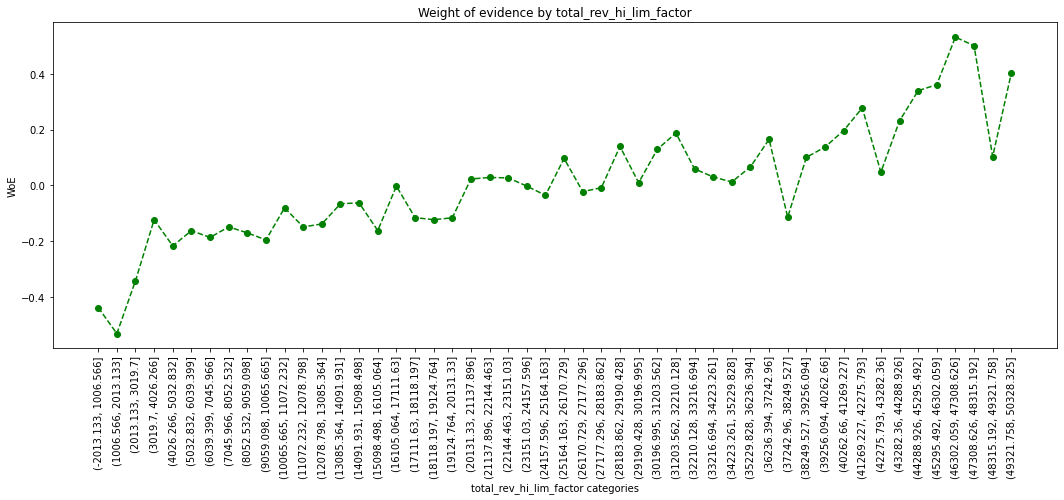

In [653]:
plot_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [654]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [655]:
### 4.14) Pre-processing continuous variables: Creating Dummy Variables of "installment"

In [656]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)


display(df_temp)

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.872165    0.005201   423.0   62.0   
1       (43.585, 71.41]   1246   0.904494    0.013361  1127.0  119.0   
2       (71.41, 99.235]   1731   0.895436    0.018562  1550.0  181.0   
3      (99.235, 127.06]   2292   0.896597    0.024577  2055.0  237.0   
4     (127.06, 154.885]   2602   0.886241    0.027901  2306.0  296.0   
5     (154.885, 182.71]   4133   0.897653    0.044318  3710.0  423.0   
6     (182.71, 210.535]   4109   0.905086    0.044061  3719.0  390.0   
7     (210.535, 238.36]   3730   0.901877    0.039997  3364.0  366.0   
8     (238.36, 266.185]   4660   0.899785    0.049969  4193.0  467.0   
9     (266.185, 294.01]   4975   0.888844    0.053347  4422.0  553.0   
10    (294.01, 321.835]   5186   0.906286    0.055610  4700.0  486.0   
11    (321.835, 349.66]   6432   0.892568    0.068971  5741.0  691.0   
12    (349.66, 377.485]   4758   0.881673    0.051020  4195.0  563.0   
13    (377.485, 405.31]   4352   0.900276    0.046667  3918.0  434.0   
14    (405.31, 433.135]   3429   0.882765    0.036769  3027.0  402.0   
15    (433.135, 460.96]   3225   0.879380    0.034582  2836.0  389.0   
16    (460.96, 488.785]   3865   0.894437    0.041445  3457.0  408.0   
17    (488.785, 516.61]   3861   0.884227    0.041402  3414.0  447.0   
18    (516.61, 544.435]   2730   0.868864    0.029274  2372.0  358.0   
19    (544.435, 572.26]   2564   0.877535    0.027494  2250.0  314.0   
20    (572.26, 600.085]   2434   0.873870    0.026100  2127.0  307.0   
21    (600.085, 627.91]   2294   0.901918    0.024599  2069.0  225.0   
22    (627.91, 655.735]   2091   0.901004    0.022422  1884.0  207.0   
23    (655.735, 683.56]   2295   0.894989    0.024609  2054.0  241.0   
24    (683.56, 711.385]   1650   0.876970    0.017693  1447.0  203.0   
25    (711.385, 739.21]   1252   0.892173    0.013425  1117.0  135.0   
26    (739.21, 767.035]   1360   0.897794    0.014583  1221.0  139.0   
27    (767.035, 794.86]   1160   0.886207    0.012439  1028.0  132.0   
28    (794.86, 822.685]   1023   0.888563    0.010970   909.0  114.0   
29    (822.685, 850.51]    967   0.885212    0.010369   856.0  111.0   
30    (850.51, 878.335]   1046   0.894837    0.011216   936.0  110.0   
31    (878.335, 906.16]    707   0.861386    0.007581   609.0   98.0   
32    (906.16, 933.985]    604   0.855960    0.006477   517.0   87.0   
33    (933.985, 961.81]    635   0.861417    0.006809   547.0   88.0   
34    (961.81, 989.635]    460   0.850000    0.004933   391.0   69.0   
35   (989.635, 1017.46]    441   0.854875    0.004729   377.0   64.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.878641    0.002209   181.0   25.0   
38  (1073.11, 1100.935]    228   0.894737    0.002445   204.0   24.0   
39  (1100.935, 1128.76]    247   0.931174    0.002649   230.0   17.0   
40  (1128.76, 1156.585]    227   0.916300    0.002434   208.0   19.0   
41  (1156.585, 1184.41]    287   0.895470    0.003078   257.0   30.0   
42  (1184.41, 1212.235]    308   0.905844    0.003303   279.0   29.0   
43  (1212.235, 1240.06]    284   0.901408    0.003045   256.0   28.0   
44  (1240.06, 1267.885]    159   0.861635    0.001705   137.0   22.0   
45  (1267.885, 1295.71]    132   0.833333    0.001415   110.0   22.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.714286    0.000225    15.0    6.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.005092    0.006084 -0.178003             NaN       NaN  inf  
1      0.013567    0.011678  0.149950        0.032329  0.327953  inf  
2      0.018660    0.017763  0.049273        0.009058  0.100678  inf  
3      0.024739    0.023258  0.061730        0.0

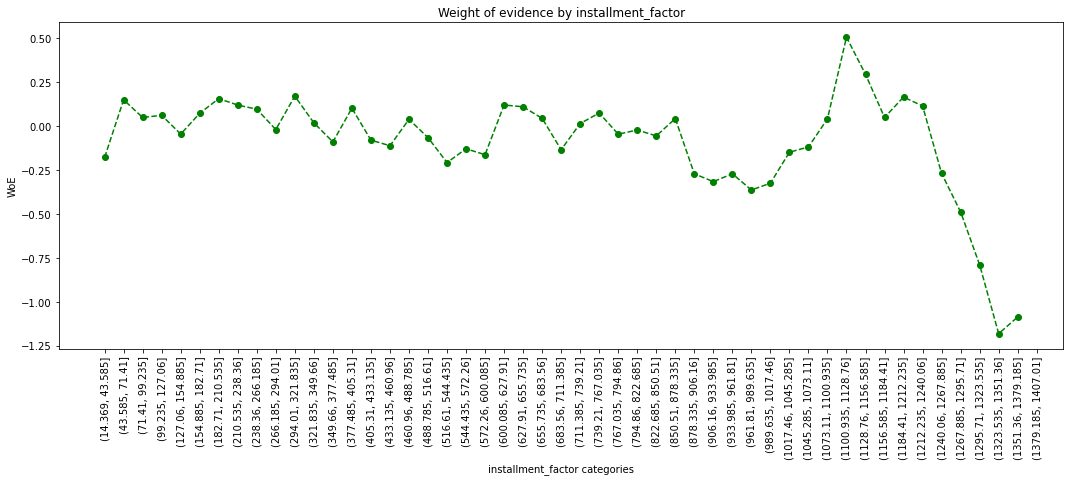

In [657]:
plot_woe(df_temp, 90)

In [658]:
# can't create dummy variables of installment because categories doesn't have nearly similar WoE 
# there is no clear pattern between independent variable and woe
# i.e woe varies greatly

In [659]:
### 4.15) Pre-processing continuous variables: Creating Dummy Variables of "annual_inc"

In [660]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

display(df_temp.head(10))

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-2695.2, 154704.0]  89203   0.889040    0.956529  79305.0  9898.0   
1    (154704.0, 304608.0]   3626   0.926641    0.038882   3360.0   266.0   
2    (304608.0, 454512.0]    282   0.929078    0.003024    262.0    20.0   
3    (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4    (604416.0, 754320.0]     23   0.956522    0.000247     22.0     1.0   
5    (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6   (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7  (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8  (1204032.0, 1353936.0]      2   0.500000    0.000021      1.0     1.0   
9  (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.954711    0.971344 -0.017272             NaN       NaN  inf  
1     0.040449    0.026104  0.437959        0.037601  0.455231  inf  
2     0.003154    0.001963  0.474372        0.002437  0.036412  inf  
3     0.000999    0.000294  1.221988        0.036038  0.747616  inf  
4     0.000265    0.000098  0.992802        0.008595  0.229186  inf  
5     0.000205    0.000098  0.734973        0.012077  0.257829  inf  
6     0.000084    0.000000       inf        0.055556       inf  inf  
7     0.000072    0.000000       inf        0.000000       NaN  inf  
8     0.000012    0.000098 -2.098241        0.500000       inf  inf  
9     0.000024    0.000000       inf        0.500000       inf  inf

In [661]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

display(df_temp.head(10))

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0    (-2695.2, 79752.0]  62621   0.877932    0.671488  54977.0  7644.0   
1   (79752.0, 154704.0]  26582   0.915206    0.285040  24328.0  2254.0   
2  (154704.0, 229656.0]   2916   0.926269    0.031268   2701.0   215.0   
3  (229656.0, 304608.0]    710   0.928169    0.007613    659.0    51.0   
4  (304608.0, 379560.0]    171   0.929825    0.001834    159.0    12.0   
5  (379560.0, 454512.0]    111   0.927928    0.001190    103.0     8.0   
6  (454512.0, 529464.0]     53   0.962264    0.000568     51.0     2.0   
7  (529464.0, 604416.0]     33   0.969697    0.000354     32.0     1.0   
8  (604416.0, 679368.0]     10   1.000000    0.000107     10.0     0.0   
9  (679368.0, 754320.0]     13   0.923077    0.000139     12.0     1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.661839    0.750147 -0.125247             NaN       NaN  inf  
1     0.292872    0.221197  0.280681        0.037273  0.405928  inf  
2     0.032516    0.021099  0.432499        0.011063  0.151818  inf  
3     0.007933    0.005005  0.460657        0.001900  0.028159  inf  
4     0.001914    0.001178  0.485757        0.001656  0.025100  inf  
5     0.001240    0.000785  0.457047        0.001897  0.028710  inf  
6     0.000614    0.000196  1.140438        0.034336  0.683391  inf  
7     0.000385    0.000098  1.367495        0.007433  0.227057  inf  
8     0.000120    0.000000       inf        0.030303       inf  inf  
9     0.000144    0.000098  0.386666        0.076923       inf  inf

In [662]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [663]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

display(df_temp.head(10))

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0    (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1   (7504.0, 10208.0]     84   0.761905    0.000958    64.0   20.0   
2  (10208.0, 12912.0]    123   0.780488    0.001403    96.0   27.0   
3  (12912.0, 15616.0]    304   0.851974    0.003467   259.0   45.0   
4  (15616.0, 18320.0]    383   0.827676    0.004368   317.0   66.0   
5  (18320.0, 21024.0]    733   0.840382    0.008359   616.0  117.0   
6  (21024.0, 23728.0]    704   0.846591    0.008028   596.0  108.0   
7  (23728.0, 26432.0]   1785   0.861064    0.020356  1537.0  248.0   
8  (26432.0, 29136.0]   1355   0.853137    0.015452  1156.0  199.0   
9  (29136.0, 31840.0]   2292   0.854276    0.026137  1958.0  334.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000128    0.000000       inf             NaN       NaN  inf  
1     0.000822    0.002043 -0.911157        0.238095       inf  inf  
2     0.001232    0.002758 -0.805796        0.018583  0.105361  inf  
3     0.003325    0.004597 -0.324142        0.071486  0.481654  inf  
4     0.004069    0.006743 -0.505060        0.024297  0.180919  inf  
5     0.007907    0.011953 -0.413234        0.012706  0.091826  inf  
6     0.007651    0.011034 -0.366198        0.006209  0.047036  inf  
7     0.019730    0.025337 -0.250148        0.014474  0.116050  inf  
8     0.014839    0.020331 -0.314891        0.007928  0.064743  inf  
9     0.025134    0.034123 -0.305769        0.001139  0.009122  inf

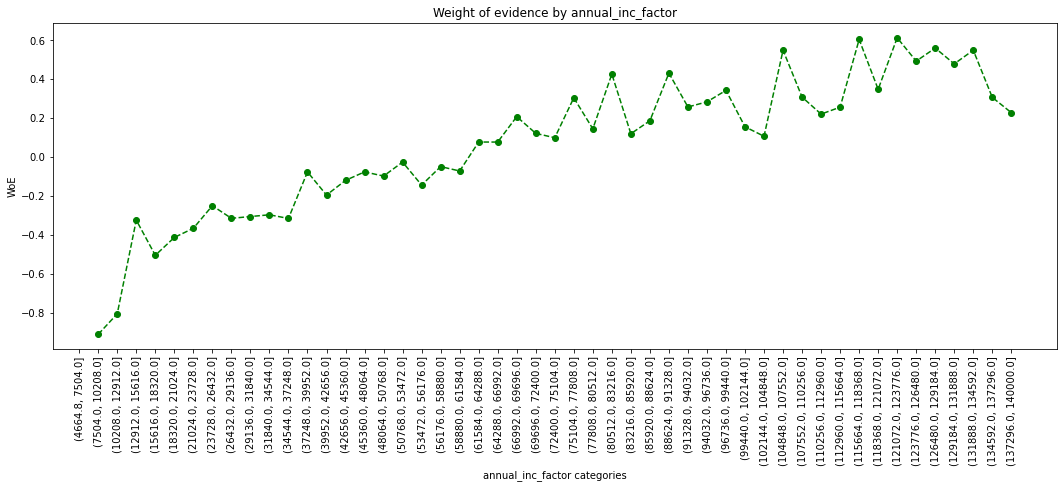

In [664]:
plot_woe(df_temp, 90)

In [665]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [666]:
### 4.16) Pre-processing continuous variables: Creating Dummy Variables of "months_since_last_delinq"

In [667]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
display(df_temp)

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.868694    0.031283  1171.0  177.0   
1                     (3.4, 6.8]   1890   0.880423    0.043861  1664.0  226.0   
2                    (6.8, 10.2]   3373   0.887044    0.078276  2992.0  381.0   
3                   (10.2, 13.6]   2496   0.895833    0.057924  2236.0  260.0   
4                   (13.6, 17.0]   3165   0.884044    0.073449  2798.0  367.0   
5                   (17.0, 20.4]   2282   0.893076    0.052958  2038.0  244.0   
6                   (20.4, 23.8]   2115   0.898345    0.049082  1900.0  215.0   
7                   (23.8, 27.2]   2755   0.895463    0.063934  2467.0  288.0   
8                   (27.2, 30.6]   1929   0.896319    0.044766  1729.0  200.0   
9                   (30.6, 34.0]   2453   0.891969    0.056926  2188.0  265.0   
10                  (34.0, 37.4]   1786   0.904255    0.041447  1615.0  171.0   
11                  (37.4, 40.8]   1765   0.887819    0.040960  1567.0  198.0   
12                  (40.8, 44.2]   2270   0.876211    0.052679  1989.0  281.0   
13                  (44.2, 47.6]   1664   0.899038    0.038616  1496.0  168.0   
14                  (47.6, 51.0]   1739   0.888442    0.040356  1545.0  194.0   
15                  (51.0, 54.4]   1158   0.887737    0.026873  1028.0  130.0   
16                  (54.4, 57.8]   1130   0.911504    0.026224  1030.0  100.0   
17                  (57.8, 61.2]   1423   0.895994    0.033023  1275.0  148.0   
18                  (61.2, 64.6]   1015   0.887685    0.023555   901.0  114.0   
19                  (64.6, 68.0]   1342   0.891952    0.031143  1197.0  145.0   
20                  (68.0, 71.4]    930   0.884946    0.021582   823.0  107.0   
21                  (71.4, 74.8]    928   0.889009    0.021536   825.0  103.0   
22                  (74.8, 78.2]   1195   0.907950    0.027732  1085.0  110.0   
23                  (78.2, 81.6]    768   0.880208    0.017823   676.0   92.0   
24                  (81.6, 85.0]    136   0.897059    0.003156   122.0   14.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

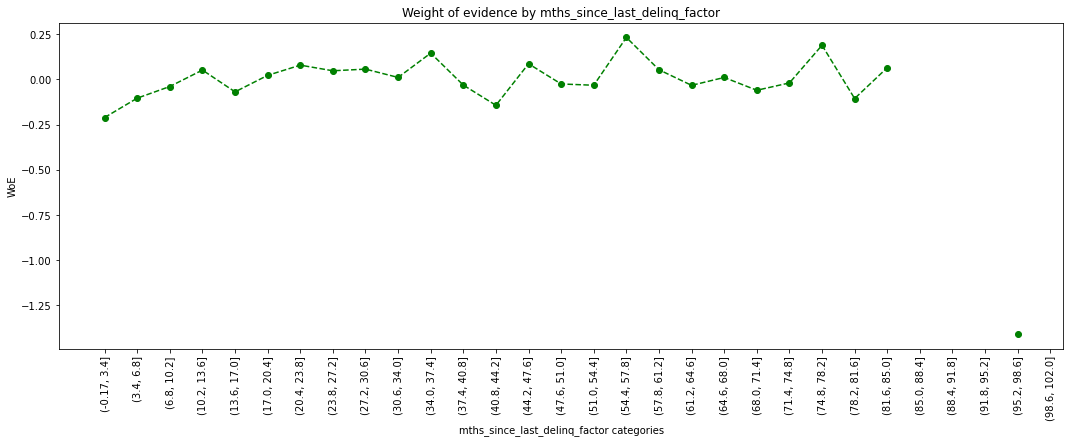

In [668]:
plot_woe(df_temp, 90)

In [669]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [670]:
### 4.17) Pre-processing continuous variables: Creating Dummy Variables of "dti"

In [671]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

display(df_temp)

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    187   0.893048    0.002005   167.0   20.0   
1         (0.4, 0.8]    184   0.880435    0.001973   162.0   22.0   
2         (0.8, 1.2]    223   0.892377    0.002391   199.0   24.0   
3         (1.2, 1.6]    255   0.905882    0.002734   231.0   24.0   
4         (1.6, 2.0]    315   0.892063    0.003378   281.0   34.0   
5       (2.0, 2.399]    324   0.913580    0.003474   296.0   28.0   
6     (2.399, 2.799]    366   0.918033    0.003925   336.0   30.0   
7     (2.799, 3.199]    442   0.907240    0.004740   401.0   41.0   
8     (3.199, 3.599]    484   0.933884    0.005190   452.0   32.0   
9     (3.599, 3.999]    563   0.902309    0.006037   508.0   55.0   
10    (3.999, 4.399]    599   0.919866    0.006423   551.0   48.0   
11    (4.399, 4.799]    661   0.906203    0.007088   599.0   62.0   
12    (4.799, 5.199]    706   0.907932    0.007570   641.0   65.0   
13    (5.199, 5.599]    821   0.917174    0.008804   753.0   68.0   
14    (5.599, 5.999]    841   0.897741    0.009018   755.0   86.0   
15    (5.999, 6.398]    889   0.912261    0.009533   811.0   78.0   
16    (6.398, 6.798]    978   0.936605    0.010487   916.0   62.0   
17    (6.798, 7.198]   1021   0.904016    0.010948   923.0   98.0   
18    (7.198, 7.598]   1057   0.905393    0.011334   957.0  100.0   
19    (7.598, 7.998]   1170   0.911966    0.012546  1067.0  103.0   
20    (7.998, 8.398]   1172   0.907850    0.012567  1064.0  108.0   
21    (8.398, 8.798]   1127   0.911269    0.012085  1027.0  100.0   
22    (8.798, 9.198]   1281   0.913349    0.013736  1170.0  111.0   
23    (9.198, 9.598]   1309   0.901451    0.014036  1180.0  129.0   
24    (9.598, 9.998]   1371   0.912473    0.014701  1251.0  120.0   
25   (9.998, 10.397]   1429   0.911826    0.015323  1303.0  126.0   
26  (10.397, 10.797]   1521   0.906640    0.016310  1379.0  142.0   
27  (10.797, 11.197]   1555   0.908682    0.016674  1413.0  142.0   
28  (11.197, 11.597]   1597   0.898560    0.017125  1435.0  162.0   
29  (11.597, 11.997]   1554   0.907979    0.016664  1411.0  143.0   
30  (11.997, 12.397]   1607   0.896702    0.017232  1441.0  166.0   
31  (12.397, 12.797]   1719   0.905759    0.018433  1557.0  162.0   
32  (12.797, 13.197]   1614   0.915118    0.017307  1477.0  137.0   
33  (13.197, 13.597]   1717   0.905067    0.018411  1554.0  163.0   
34  (13.597, 13.997]   1707   0.892209    0.018304  1523.0  184.0   
35  (13.997, 14.396]   1724   0.901972    0.018487  1555.0  169.0   
36  (14.396, 14.796]   1773   0.894529    0.019012  1586.0  187.0   
37  (14.796, 15.196]   1755   0.898006    0.018819  1576.0  179.0   
38  (15.196, 15.596]   1695   0.896755    0.018176  1520.0  175.0   
39  (15.596, 15.996]   1752   0.901826    0.018787  1580.0  172.0   
40  (15.996, 16.396]   1653   0.901391    0.017725  1490.0  163.0   
41  (16.396, 16.796]   1689   0.893428    0.018111  1509.0  180.0   
42  (16.796, 17.196]   1770   0.897740    0.018980  1589.0  181.0   
43  (17.196, 17.596]   1708   0.882904    0.018315  1508.0  200.0   
44  (17.596, 17.996]   1680   0.899405    0.018015  1511.0  169.0   
45  (17.996, 18.395]   1671   0.900060    0.017918  1504.0  167.0   
46  (18.395, 18.795]   1638   0.901709    0.017564  1477.0  161.0   
47  (18.795, 19.195]   1628   0.880835    0.017457  1434.0  194.0   
48  (19.195, 19.595]   1606   0.887298    0.017221  1425.0  181.0   
49  (19.595, 19.995]   1603   0.882720    0.017189  1415.0  188.0   
50  (19.995, 20.395]   1512   0.887566    0.016213  1342.0  170.0   
51  (20.395, 20.795]   1656   0.880435    0.017757  1458.0  198.0   
52  (20.795, 21.195]   1505   0.884385    0.016138  1331.0  174.0   
53  (21.195, 21.595]   1455   0.879038    0.015602  1279.0  176.0   
54  (21.595, 21.995]   1452   0.882920    0.015570  1282.0  170.0   
55  (21.995, 22.394]   1394   0.868006    0.014948  1210.0  184.0   
56  (22.394, 22.794]   1309   0.858671    0.014036  1124.0  185.0   
57  (22.

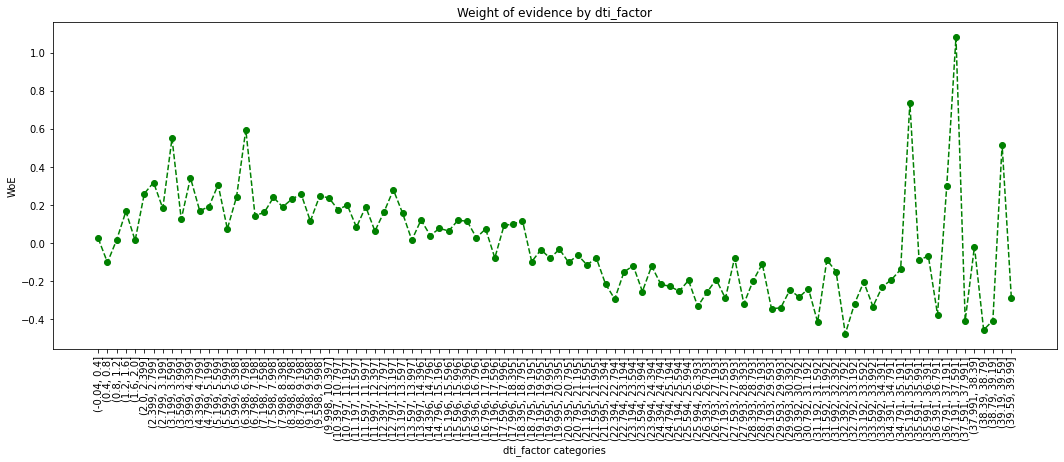

In [672]:
plot_woe(df_temp, 90)

In [673]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [674]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])

display(df_temp)

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    328   0.884146    0.003544   290.0   38.0     0.003518   
1      (0.7, 1.4]    393   0.903308    0.004246   355.0   38.0     0.004306   
2      (1.4, 2.1]    536   0.895522    0.005792   480.0   56.0     0.005823   
3      (2.1, 2.8]    607   0.915980    0.006559   556.0   51.0     0.006745   
4      (2.8, 3.5]    811   0.924784    0.008763   750.0   61.0     0.009098   
5      (3.5, 4.2]    970   0.903093    0.010481   876.0   94.0     0.010626   
6      (4.2, 4.9]   1140   0.913158    0.012318  1041.0   99.0     0.012628   
7      (4.9, 5.6]   1370   0.911679    0.014803  1249.0  121.0     0.015151   
8      (5.6, 6.3]   1491   0.904762    0.016111  1349.0  142.0     0.016364   
9      (6.3, 7.0]   1722   0.926829    0.018607  1596.0  126.0     0.019360   
10     (7.0, 7.7]   1846   0.904117    0.019946  1669.0  177.0     0.020246   
11     (7.7, 8.4]   2044   0.909491    0.022086  1859.0  185.0     0.022551   
12     (8.4, 9.1]   2097   0.910348    0.022659  1909.0  188.0     0.023157   
13     (9.1, 9.8]   2319   0.908150    0.025057  2106.0  213.0     0.025547   
14    (9.8, 10.5]   2519   0.909885    0.027218  2292.0  227.0     0.027803   
15   (10.5, 11.2]   2694   0.908315    0.029109  2447.0  247.0     0.029684   
16   (11.2, 11.9]   2748   0.901747    0.029693  2478.0  270.0     0.030060   
17   (11.9, 12.6]   2844   0.903657    0.030730  2570.0  274.0     0.031176   
18   (12.6, 13.3]   2886   0.908870    0.031184  2623.0  263.0     0.031819   
19   (13.3, 14.0]   3056   0.898233    0.033021  2745.0  311.0     0.033299   
20   (14.0, 14.7]   3068   0.898305    0.033150  2756.0  312.0     0.033432   
21   (14.7, 15.4]   2954   0.898104    0.031919  2653.0  301.0     0.032183   
22   (15.4, 16.1]   3050   0.900656    0.032956  2747.0  303.0     0.033323   
23   (16.1, 16.8]   2914   0.896019    0.031486  2611.0  303.0     0.031673   
24   (16.8, 17.5]   3078   0.886940    0.033258  2730.0  348.0     0.033117   
25   (17.5, 18.2]   2964   0.903171    0.032027  2677.0  287.0     0.032474   
26   (18.2, 18.9]   2863   0.894167    0.030935  2560.0  303.0     0.031054   
27   (18.9, 19.6]   2796   0.887339    0.030211  2481.0  315.0     0.030096   
28   (19.6, 20.3]   2772   0.887807    0.029952  2461.0  311.0     0.029853   
29   (20.3, 21.0]   2830   0.879505    0.030579  2489.0  341.0     0.030193   
30   (21.0, 21.7]   2517   0.883989    0.027197  2225.0  292.0     0.026991   
31   (21.7, 22.4]   2495   0.870541    0.026959  2172.0  323.0     0.026348   
32   (22.4, 23.1]   2261   0.865989    0.024431  1958.0  303.0     0.023752   
33   (23.1, 23.8]   2327   0.876235    0.025144  2039.0  288.0     0.024734   
34   (23.8, 24.5]   2127   0.870710    0.022983  1852.0  275.0     0.022466   
35   (24.5, 25.2]   1929   0.867807    0.020843  1674.0  255.0     0.020307   
36   (25.2, 25.9]   1707   0.865847    0.018444  1478.0  229.0     0.017929   
37   (25.9, 26.6]   1657   0.858177    0.017904  1422.0  235.0     0.017250   
38   (26.6, 27.3]   1553   0.867354    0.016780  1347.0  206.0     0.016340   
39   (27.3, 28.0]   1559   0.873637    0.016845  1362.0  197.0     0.016522   
40   (28.0, 28.7]   1390   0.861871    0.015019  1198.0  192.0     0.014532   
41   (28.7, 29.4]   1341   0.869500    0.014490  1166.0  175.0     0.014144   
42   (29.4, 30.1]   1147   0.851787    0.012394   977.0  170.0     0.011852   
43   (30.1, 30.8]    838   0.862768    0.009055   723.0  115.0     0.008770   
44   (30.8, 31.5]    798   0.859649    0.008623   686.0  112.0     0.008322   
45   (31.5, 32.2]    734   0.877384    0.007931   644.0   90.0     0.007812   
46   (32.2, 32.9]    696   0.849138    0.007520   591.0  105.0     0.007169   
47   (32.9, 33.6]    621   0.856683    0.006710   532.0   89.0     0.006453   
48   (33.6, 34.3]    634   0.859621    0.006850   545.0   89.0     0.006611   
49   (34.3, 35.0]    507   0.867850    0.005478   440.0  

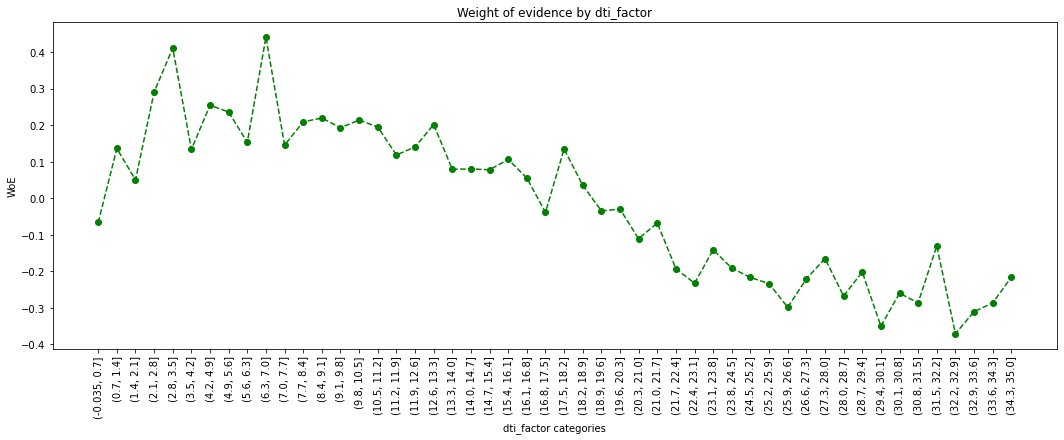

In [675]:
plot_woe(df_temp, 90)

In [676]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [677]:
### 4.18) Pre-processing continuous variables: Creating Dummy Variables of "mths_since_last_record"

In [678]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.741803    0.019410   181.0   63.0   
1                   (2.58, 5.16]     36   0.888889    0.002864    32.0    4.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.939394    0.005250    62.0    4.0   
4                  (10.32, 12.9]     42   0.833333    0.003341    35.0    7.0   
5                  (12.9, 15.48]     69   0.869565    0.005489    60.0    9.0   
6                 (15.48, 18.06]     95   0.863158    0.007557    82.0   13.0   
7                 (18.06, 20.64]     58   0.965517    0.004614    56.0    2.0   
8                 (20.64, 23.22]    101   0.891089    0.008034    90.0   11.0   
9                  (23.22, 25.8]     94   0.946809    0.007478    89.0    5.0   
10                 (25.8, 28.38]    135   0.896296    0.010739   121.0   14.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.923469    0.015591   181.0   15.0   
13                (33.54, 36.12]    195   0.907692    0.015512   177.0   18.0   
14                 (36.12, 38.7]    166   0.909639    0.013205   151.0   15.0   
15                 (38.7, 41.28]    234   0.905983    0.018614   212.0   22.0   
16                (41.28, 43.86]    194   0.896907    0.015432   174.0   20.0   
17                (43.86, 46.44]    328   0.917683    0.026092   301.0   27.0   
18                (46.44, 49.02]    367   0.920981    0.029194   338.0   29.0   
19                 (49.02, 51.6]    231   0.943723    0.018376   218.0   13.0   
20                 (51.6, 54.18]    447   0.926174    0.035558   414.0   33.0   
21                (54.18, 56.76]    264   0.897727    0.021001   237.0   27.0   
22                (56.76, 59.34]    393   0.928753    0.031262   365.0   28.0   
23                (59.34, 61.92]    287   0.909408    0.022830   261.0   26.0   
24                 (61.92, 64.5]    405   0.920988    0.032217   373.0   32.0   
25                 (64.5, 67.08]    394   0.961929    0.031342   379.0   15.0   
26                (67.08, 69.66]    272   0.893382    0.021637   243.0   29.0   
27                (69.66, 72.24]    366   0.912568    0.029115   334.0   32.0   
28                (72.24, 74.82]    231   0.922078    0.018376   213.0   18.0   
29                 (74.82, 77.4]    350   0.920000    0.027842   322.0   28.0   
30                 (77.4, 79.98]    228   0.903509    0.018137   206.0   22.0   
31                (79.98, 82.56]    355   0.895775    0.028240   318.0   37.0   
32                (82.56, 85.14]    288   0.916667    0.022910   264.0   24.0   
33                (85.14, 87.72]    251   0.816733    0.019967   205.0   46.0   
34                 (87.72, 90.3]    345   0.889855    0.027444   307.0   38.0   
35                 (90.3, 92.88]    249   0.843373    0.019807   210.0   39.0   
36                (92.88, 95.46]    385   0.862338    0.030626   332.0   53.0   
37                (95.46, 98.04]    401   0.877805    0.031899   352.0   49.0   
38               (98.04, 100.62]    327   0.871560    0.026012   285.0   42.0   
39               (100.62, 103.2]    526   0.884030    0.041842   465.0   61.0   
40               (103.2, 105.78]    396   0.891414    0.031501   353.0   43.0   
41              (105.78, 108.36]    565   0.886726    0.044945   501.0   64.0   
42              (108.36, 110.94]    407   0.911548    0.032376   371.0   36.0   
43              (110.94, 113.52]    524   0.883588    0.041683   463.0   61.0   
44               (113.52, 116.1]    515   0.908738    0.040967   468.0   47.0   
45               (116.1, 118.68]    314   0.882166    0.024978   277.0   37.0   
46              (118.68, 121.26]     92   0.847826    0.007318    78.0   14.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

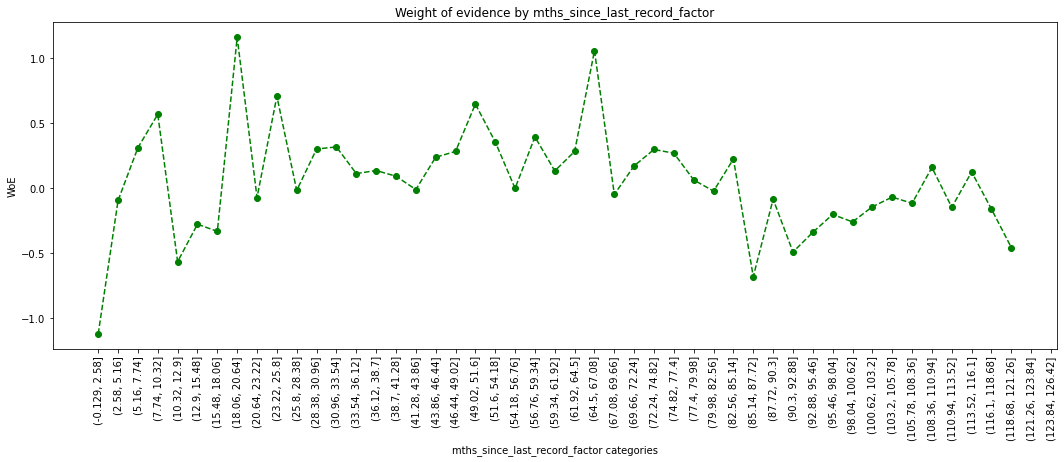

In [679]:
plot_woe(df_temp, 90)

In [680]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

## 4) Data preparation for test data
Run above cells from 3 till here to prepare the test data 

In [681]:
df_inputs_prepr.shape,df_targets_prepr.shape

((93257, 323), (93257,))

In [682]:
"""loan_data_inputs_train  = df_inputs_prepr
loan_data_targets_train = df_targets_prepr
loan_data_inputs_train.to_csv("data/loan_data_inputs_train.csv")
loan_data_targets_train.to_csv("data/loan_data_targets_train.csv")"""

'loan_data_inputs_train  = df_inputs_prepr\nloan_data_targets_train = df_targets_prepr\nloan_data_inputs_train.to_csv("data/loan_data_inputs_train.csv")\nloan_data_targets_train.to_csv("data/loan_data_targets_train.csv")'

In [683]:
loan_data_inputs_test = df_inputs_prepr
loan_data_targets_test = df_targets_prepr
loan_data_inputs_test.to_csv("data/loan_data_inputs_test.csv")
loan_data_targets_test.to_csv("data/loan_data_targets_test.csv")

In [684]:
print(loan_data_inputs_train.shape)
print(loan_data_inputs_test.shape)

(373028, 323)
(93257, 323)


In [685]:
df_targets_prepr.tail()

115       1
296284    1
61777     0
91763     1
167512    1
Name: good_bad, dtype: int32

In [686]:
df_inputs_prepr.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
115      1055725    1287293       8000         8000           8000.0   
296284  29023401   31546575      24000        24000          24000.0   
61777    8995299   10787405      35000        35000          34900.0   
91763    7062952    8724517      18000        18000          17950.0   
167512   3286511    4058975      16000        16000          16000.0   

              term  int_rate  installment grade sub_grade  \
115      36 months     11.71       264.61     B        B3   
296284   60 months     10.15       511.71     B        B2   
61777    36 months      8.90      1111.37     A        A5   
91763    36 months      8.90       571.56     A        A5   
167512   36 months      7.62       498.59     A        A3   

                                  emp_title emp_length home_ownership  \
115                                Wal-Mart    9 years       MORTGAGE   
296284  Sr. Systems Engineer/IT Procurement    4 years           RENT   
61777                                 Coach    3 years       MORTGAGE   
91763                                U-Haul    9 years       MORTGAGE   
167512                   College/University    3 years           RENT   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
115        35000.0            Verified  Dec-11   Fully Paid          n   
296284     95000.0            Verified  Oct-14      Current          n   
61777     150000.0     Source Verified  Nov-13  Charged Off          n   
91763      55000.0            Verified  Sep-13   Fully Paid          n   
167512     90000.0        Not Verified  Feb-13   Fully Paid          n   

                                                      url  \
115     https://www.lendingclub.com/browse/loanDetail....   
296284  https://www.lendingclub.com/browse/loanDetail....   
61777   https://www.lendingclub.com/browse/loanDetail....   
91763   https://www.lendingclub.com/browse/loanDetail....   
167512  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
115       Borrower added on 12/14/11 > I will consolid...         credit_card   
296284                                                NaN  debt_consolidation   
61777     Borrower added on 11/14/13 > Consolidate Cre...  debt_consolidation   
91763     Borrower added on 09/08/13 > Consolidating d...  debt_consolidation   
167512    Borrower added on 01/27/13 > During graduate...  debt_consolidation   

                     title zip_code addr_state    dti  delinq_2yrs  \
115     Consolidation Loan    895xx         NV   9.70          0.0   
296284  Debt consolidation    604xx         IL  18.28          0.0   
61777     Credit Card Loan    712xx         LA   9.38          0.0   
91763   Debt consolidation    860xx         AZ  12.31          0.0   
167512  Debt Consolidation    941xx         CA  19.41          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
115              Apr-06             0.0                     NaN   
296284           Jun-86             0.0                    59.0   
61777            Dec-95             0.0                     NaN   
91763            Oct-92             0.0                     NaN   
167512           Jan-99             0.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
115                        NaN       7.0      0.0       6142        46.5   
296284                     NaN      10.0      0.0      15217        64.5   
61777                      NaN       9.0      0.0      27828        48.3   
91763                      NaN       7.0      0.0      14631        69.1   
167512                     NaN      15.0      0.0       4590        32.9   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
115           8.0                   f       0.00           0.00   9434.776936   
296284       22.0                